<a href="https://colab.research.google.com/github/Hernan83/Covid19/blob/main/Trabajo_Final_Hernan_Pichel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS Y ESTUDIO DEL DATASET COVID 19

---


En el siguiente trabajo tengo como objetivo realizar un analisis del dataset para poner en practica los puntos aprendidos en "Data Science"

#ABSTRACT

La base de datos elegida contiene datos reales estadisticos de la poblacion que fue afectada por el virus covid 19 en la pandemia de 2020. Este suceso historico permitio contar con una gran cantidad de informacion que permite estudiar la existencia de tendencias o probabilidades de fallecimiento de personas por el virus segun sus atributos. Tambien de la probabilidad de muerte en el contexto del pais donde suceden los casos. Si fueran casos graves, tener disponibilidad de atencion de alta complejidad.
Una pregunta que nos podemos hacer es si "¿se puede predecir el numero de casos confirmado de COVID -19 en funcion de las variables que se analizaron en la base de datos?" Ingresando ubicacion, fecha, tasa de vacunacion, densidad de poblacion, ect.
Otra pregunta es si los factores de riesgo tienen insidencia en el aumento de muertes, otra pregunta podria ser si en todos los paises o regiones existentes en el dataset tiene el mismo patron de comportamiento de casos y de muertes o existen casos aislados con funcionamiento diferente. El propósito fundamental de este trabajo radica en su capacidad para ser aplicado en escenarios futuros análogos, con el potencial de preservar vidas y contribuir al bienestar de la humanidad en su conjunto. Considerando que su audiencia destinataria abarcará a toda la población humana.

# Objetivo
El objetivo del siguiente estudio es predecir la cantidad de muertes en funcion del contexto (aislamiento, vacunacion, inmunidad de rebaño, ect.). En primer lugar se realiza solo para Argentina y luego ampliar el estudio a mas paises.

# Contexto
La pandemia de COVID-19, también conocida como la enfermedad causada por el coronavirus SARS-CoV-2, ha sido uno de los acontecimientos más significativos y desafiantes del siglo XXI. Desde que fue detectado por primera vez en diciembre de 2019 en la ciudad de Wuhan, China, este nuevo coronavirus ha provocado una crisis de salud pública sin precedentes en la era moderna. En este informe, exploraremos los datos y analizaremos aspectos clave de esta pandemia que ha impactado a Argentina y a todas las naciones del mundo. En este momento historico la exploracion y analisis de los datos fue fundamental para tomar las desiciones mas acertadas.


# Problema Comercial
La pandemia de COVID-19 ha tenido un impacto devastador en la economía global. Las medidas de confinamiento y distanciamiento social implementadas para controlar la propagación del virus han llevado al cierre temporal de negocios y al colapso de sectores enteros, lo que ha generado pérdida de empleos y una recesión global. Además, el aislamiento social ha afectado la salud mental de muchas personas. ¿Que podemos aprender de todo lo sucedido? ¿es posible haber tomado mejores desiciones?. Para esto analizaremos de los datos que nos dejo la pandemia.

Importamos las bibliotecas necesarias para trabajar y leemos los dataframes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from datetime import datetime
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [2]:
import os
import scipy
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [3]:
# Usamos la direccion de MyDrive porque al intentar subirlo a GitHub me limita en el tamaño. Y el archivo existente en GitHub esta actualizado hasta la fecha y cambian algunas cosas que luego dan problemas.
urlcovid = '/content/drive/MyDrive/Datasets - Data scientyst/owid-covid-data.csv'
urlextra = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

covid = pd.read_csv(urlcovid,sep = ',')
extra = pd.read_csv(urlextra, sep = ',')


Como cambiamos el origen del set covid tenemos que limitar la fecha ya que el nuevo origen tiene una actualizacion diaria.

In [4]:
fecha_final = datetime.strptime('2022-04-20', '%Y-%m-%d')
covid['date'] = pd.to_datetime(covid['date'])
extra['Date'] = pd.to_datetime(extra['Date'], format='%Y%m%d')

In [5]:
covid = covid[covid['date'] <= fecha_final]
extra = extra[extra['Date'] <= fecha_final]

# Meta data


Informacion principal de nuestra base de datos. Mostrare en forma general los numeros dentro de los Dataframes estudiados antes de iniciar el EDA

Vamos a traducir el nombre de las columnas de ambos datases

In [6]:
covid.columns
columnas_covid = ['Código ISO','Continente','ubicación','fecha','casos totales','casos nuevos','nuevos casos suavizados','muertes totales','nuevas muertes','nuevas muertes suavizadas','casos totales por millón','nuevos casos por millón','nuevos casos suavizados por millón','muertes totales por millón','nuevas muertes por millón','nuevas  muertes suavizadas por millón','tasa de reproducción','Pacientes en la UCI','Pacientes de UCI por millón','Pacientes de HOSP','Pacientes de HOSP por millón','Ingresos semanales en la  UCI','Ingresos semanales en la  UCI por millón','Admisiones semanales de HOSP','Admisiones semanales de HOSP por millón','Nuevas pruebas','Pruebas totales','Pruebas totales por mil','Nuevas pruebas por mil','Nuevas pruebas suavizadas','Nuevas pruebas suavizadas por mil','tasa positiva','pruebas por caso','unidades de pruebas','vacunas totales','personas vacunadas','personas completamente vacunadas','refuerzos  totales','nuevas  vacunas','nuevas vacunas suavizadas','vacunas totales por cien','personas vacunadas por cien','personas completamente vacunadas por cien','refuerzos totales por cien','nuevas  vacunas suavizadas por millón','Nuevas personas vacunadas suavizadas','Nuevas personas vacunadas suavizadas por cien','índice de rigurosidad','población','densidad de población','edad mediana','65 años más','70 años más','PIB per cápita','pobreza extrema','tasa de  mortalidad cardiovasca','prevalencia de diabetes','mujeres fumadoras','fumadores masculinos','instalaciones para  lavarse las manos','camas de hospital por mil','esperanza de vida','índice de desarrollo humano','exceso de mortalidad acumulada absoluta','exceso de mortalidad acumulativo','exceso de  mortalidad	','exceso de mortalidad acumulada por millón']
columnas_extra = ['NombrePaís', 'CódigoPaís', 'NombreRegión', 'CódigoRegión','Jurisdicción', 'Fecha', 'C1M_Cierre de la escuela', 'C1M_Flag','C2M_Cierre del lugar de trabajo', 'C2M_Flag', 'C3M_Cancelar eventos públicos','C3M_Flag', 'C4M_Restricciones en reuniones', 'C4M_Flag','C5M_Cerrar transporte público', 'C5M_Flag','C6M_Requisitos de quedarse en casa', 'C6M_Flag','C7M_Restricciones al movimiento interno', 'C7M_Flag','C8EV_Controles de viajes internacionales', 'E1_Apoyo a los ingresos', 'E1_Flag','E2_Alivio de deuda/contrato', 'E3_Medidas fiscales','E4_Apoyo internacional', 'H1_Campañas de información pública','H1_Flag', 'H2_Política de pruebas', 'H3_Seguimiento de contactos','H4_Inversión de emergencia en asistencia sanitaria', 'H5_Inversión en vacunas','H6M_Cubiertas faciales', 'H6M_Flag', 'H7_Política de vacunación', 'H7_Flag','H8M_Protección de personas mayores', 'H8M_Flag','V1_Priorización de vacunas (resumen)','V2A_Disponibilidad de vacunas (resumen)','V2B_Edad mínima de elegibilidad/disponibilidad de la vacuna (resumen de la población general)','V2C_Edad mínima de elegibilidad/disponibilidad para la vacuna (resumen de riesgo)','V2D_Médicamente/clínicamente vulnerable (no ancianos)', 'V2E_Education','V2F_Trabajadores de primera línea (no sanitarios)','V2G_Trabajadores de primera línea (atención sanitaria)','V3_Apoyo financiero para vacunas (resumen)','V4_Vacunación Obligatoria (resumen)', 'CasosConfirmados','Muertes confirmadas', 'Mayoridad vacunada', 'Población vacunada','Índice de rigor_Promedio', 'Índice de respuesta del gobierno_Promedio','Índice de salud de contención_promedio', 'Índice de soporte económico']

In [7]:
covid.columns = columnas_covid
extra.columns = columnas_extra
covid.head()

Código ISO Continente    ubicación      fecha  casos totales  casos nuevos  \
0        AFG       Asia  Afghanistan 2020-02-24            5.0           5.0   
1        AFG       Asia  Afghanistan 2020-02-25            5.0           0.0   
2        AFG       Asia  Afghanistan 2020-02-26            5.0           0.0   
3        AFG       Asia  Afghanistan 2020-02-27            5.0           0.0   
4        AFG       Asia  Afghanistan 2020-02-28            5.0           0.0   

   nuevos casos suavizados  muertes totales  nuevas muertes  \
0                      NaN              NaN             NaN   
1                      NaN              NaN             NaN   
2                      NaN              NaN             NaN   
3                      NaN              NaN             NaN   
4                      NaN              NaN             NaN   

   nuevas muertes suavizadas  ...  mujeres fumadoras  fumadores masculinos  \
0                        NaN  ...                NaN                   NaN   
1                        NaN  ...                NaN                   NaN   
2                        NaN  ...                NaN                   NaN   
3                        NaN  ...                NaN                   NaN   
4                        NaN  ...                NaN                   NaN   

   instalaciones para  lavarse las manos  camas de hospital por mil  \
0                                 37.746                        0.5   
1                                 37.746                        0.5   
2                                 37.746                        0.5   
3                                 37.746                        0.5   
4                                 37.746                        0.5   

   esperanza de vida  índice de desarrollo humano  \
0              64.83                        0.511   
1              64.83                        0.511   
2              64.83                        0.511   
3              64.83                        0.511   
4              64.83                        0.511   

   exceso de mortalidad acumulada absoluta  exceso de mortalidad acumulativo  \
0                                      NaN                               NaN   
1                                      NaN                               NaN   
2                                      NaN                               NaN   
3                                      NaN                               NaN   
4                                      NaN                               NaN   

   exceso de  mortalidad\t  exceso de mortalidad acumulada por millón  
0                      NaN                                        NaN  
1                      NaN                                        NaN  
2                      NaN                                        NaN  
3                      NaN                                        NaN  
4                      NaN                                        NaN  

[5 rows x 67 columns]

Cuales son los paises que se encuentran en la columna "Ubicacion"

In [8]:
extra.head()

NombrePaís CódigoPaís  NombreRegión  CódigoRegión Jurisdicción      Fecha  \
0      Aruba        ABW           NaN           NaN    NAT_TOTAL 2020-01-01   
1      Aruba        ABW           NaN           NaN    NAT_TOTAL 2020-01-02   
2      Aruba        ABW           NaN           NaN    NAT_TOTAL 2020-01-03   
3      Aruba        ABW           NaN           NaN    NAT_TOTAL 2020-01-04   
4      Aruba        ABW           NaN           NaN    NAT_TOTAL 2020-01-05   

   C1M_Cierre de la escuela  C1M_Flag  C2M_Cierre del lugar de trabajo  \
0                       0.0       NaN                              0.0   
1                       0.0       NaN                              0.0   
2                       0.0       NaN                              0.0   
3                       0.0       NaN                              0.0   
4                       0.0       NaN                              0.0   

   C2M_Flag  ...  V3_Apoyo financiero para vacunas (resumen)  \
0       NaN  ...                                           0   
1       NaN  ...                                           0   
2       NaN  ...                                           0   
3       NaN  ...                                           0   
4       NaN  ...                                           0   

   V4_Vacunación Obligatoria (resumen)  CasosConfirmados  Muertes confirmadas  \
0                                  NaN               0.0                  0.0   
1                                  NaN               0.0                  0.0   
2                                  NaN               0.0                  0.0   
3                                  NaN               0.0                  0.0   
4                                  NaN               0.0                  0.0   

   Mayoridad vacunada  Población vacunada  Índice de rigor_Promedio  \
0                  NV                 0.0                       0.0   
1                  NV                 0.0                       0.0   
2                  NV                 0.0                       0.0   
3                  NV                 0.0                       0.0   
4                  NV                 0.0                       0.0   

   Índice de respuesta del gobierno_Promedio  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Índice de salud de contención_promedio  Índice de soporte económico  
0                                     0.0                          0.0  
1                                     0.0                          0.0  
2                                     0.0                          0.0  
3                                     0.0                          0.0  
4                                     0.0                          0.0  

[5 rows x 56 columns]

Verifiquemos el nombre de las ubicaciones

In [9]:
covid['ubicación'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Dejemos solo los paises, el resto lo descartamos por el momento

In [10]:
paises=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola','Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba','Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain','Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin','Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba','Bosnia and Herzegovina', 'Botswana', 'Brazil','British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso','Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde','Cayman Islands', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands','Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao','Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark','Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt','El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia','Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France','French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany','Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada','Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana','Haiti', 'Honduras', 'Hong Kong', 'Hungary','Iceland', 'India', 'Indonesia', 'Iran', 'Iraq','Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan','Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo','Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho','Liberia', 'Libya', 'Liechtenstein', 'Lithuania','Luxembourg', 'Macao', 'Madagascar','Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta','Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico','Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia','Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar','Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia','New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue','North Macedonia', 'Northern Cyprus', 'Norway','Oceania', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama','Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn','Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda','Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia','Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines','Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia','Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore','Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia','Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan','Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan','Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tokelau','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey','Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda','Ukraine', 'United Arab Emirates', 'United Kingdom','United States', 'Uruguay', 'Uzbekistan','Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna','Yemen', 'Zambia', 'Zimbabwe']

In [11]:
cantidad_de_paises= len(paises)
print('El numero de paises en nuestro dataset es:',cantidad_de_paises)

El numero de paises en nuestro dataset es: 226


A modo informativo sumemos muertes y casos de todo el mundo

In [12]:
filtro = covid['ubicación'].isin(paises)
datos_filtrados = covid[filtro]

total_contagios = datos_filtrados['casos nuevos'].sum()
total_muertos = datos_filtrados['nuevas muertes'].sum()

print('Cantidad de contagios en los países de interés:', total_contagios)
print('Cantidad de muertos en los países de interés:', total_muertos)

Cantidad de contagios en los países de interés: 447835490.0
Cantidad de muertos en los países de interés: 5977490.0


Filtremos los continentes y agrupemos la sumatoria de casos y muertes en cada uno

In [13]:
Continentes =[ 'Africa','Asia','Europe','North America','Oceania','South America']
filtro2 = covid['ubicación'].isin(Continentes)
datosfiltrados2= covid[filtro2]

In [14]:
resumen_casos_por_continente = datosfiltrados2.groupby('ubicación')['casos nuevos'].sum().reset_index().sort_values(by='casos nuevos', ascending=False)
resumen_muertes_por_continente = datosfiltrados2.groupby('ubicación')['nuevas muertes'].sum().reset_index().sort_values(by='nuevas muertes', ascending=False)

In [15]:
datos_continente=resumen_casos_por_continente.merge(resumen_muertes_por_continente,on = 'ubicación')
datos_continente['% de muertos']=round(datos_continente['nuevas muertes']/datos_continente['casos nuevos']*100, ndigits=2)
datos_continente['casos nuevos'] = datos_continente['casos nuevos'].astype(int)
datos_continente['nuevas muertes'] = datos_continente['nuevas muertes'].astype(int)
datos_continente

ubicación  casos nuevos  nuevas muertes  % de muertos
0         Europe     160935382         1724659          1.07
1           Asia     119995444         1357219          1.13
2  North America      93399049         1380039          1.48
3  South America      54528768         1250520          2.29
4         Africa      11254551          248969          2.21
5        Oceania       3861148            8042          0.21

Text(0.5, 1.0, 'Casos totales por continente')

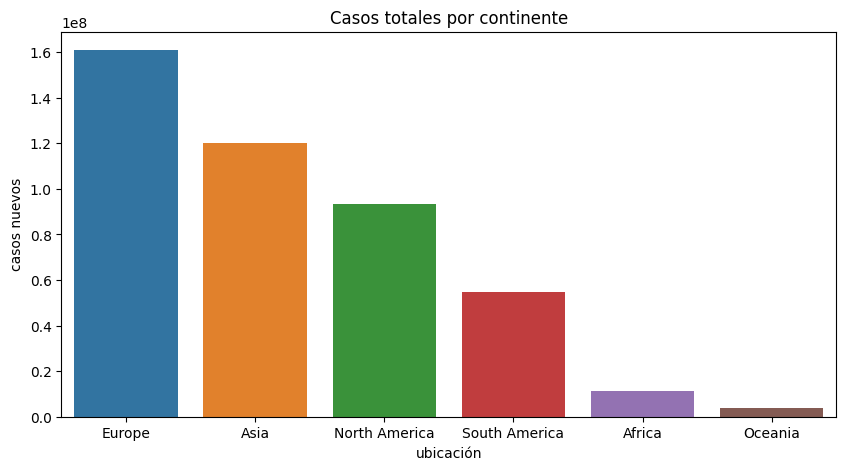

In [16]:
plt.subplots(figsize=(10,5))
sns.barplot(data=resumen_casos_por_continente, x = 'ubicación', y = 'casos nuevos')
plt.title('Casos totales por continente')

Text(0.5, 1.0, 'Muertes totales por contintente')

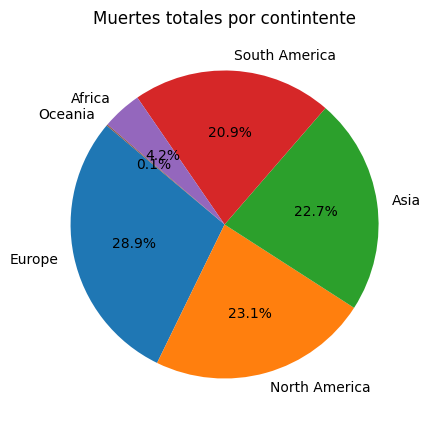

In [17]:
plt.subplots(figsize=(10,5))
plt.pie(resumen_muertes_por_continente['nuevas muertes'],labels=resumen_muertes_por_continente['ubicación'],  autopct='%1.1f%%', startangle=140)
plt.title('Muertes totales por contintente')

# EDA
Exploratory Data Analyst

En un primer momento, tenemos 2 bases de datos con las cuales vamos a trabajar. la primera que vamos a llamar `"covid"` es la que contiene todos los datos de contagios, cantidad de vacunados, muertes, etc. durante la pandemia, la segunda base de datos la vamos a llamar `"extra"` y son todos los datos extra que encontramos de medidas tomadas por los paises con el objetivo de evitar la propagacion del virus y mitigar el impacto social y economico: cuarentena, economicas, gubernamentales que le aportarán valor al estudio que realizaremos. Partiendo de aqui surgen varias preguntas:


*   ¿Podremos crear un modelo que prediga muertes?
*   ¿Podremos crear un modelo que prediga contagios?
*   ¿Existen medidas eficaces para disminuir la velocidad de contagios?¿Cuales fueron?
*   ¿Mediante el analisis de datos, es posible encontrar cuales son las medidas mas efectivas para evitar muertes?
*   ¿Es posible utilizar la experiencia de paises que sufrieron inicialmente la enfermedad para predecir el comportamiento en Argentina?



**Descripcion de DATOS** **EXTRA**

  El OxCGRT (database extra) reporta información disponible públicamente sobre 24 indicadores de políticas y un campo de notas diversas de la respuesta del gobierno organizado en cuatro grupos:

  C - políticas de contención y cierre

  E - políticas económicas

  H - políticas del sistema de salud

  V - políticas de vacunación

  Para ayudar a entender los datos, hemos producido cuatro índices que agregan los datos en un solo número. Para obtener más detalles sobre cómo se componen los índices, consulte la sección ' Cálculo de índices de políticas ' en nuestra documentación. Cada uno de estos índices reporta un número entre 0 y 100 que refleja el nivel de respuesta del gobierno en ciertas dimensiones:

    índice general de respuesta del gobierno (todos los indicadores)
    índice de contención y salud (todos los indicadores C y H)
    índice de rigor (todos los indicadores C, más el H1 que registra las campañas de información pública)
    índice de apoyo económico (todos los indicadores E)
  Estos índices son una medida de cuántos de los tipos de políticas relevantes ha actuado un gobierno y en qué medida. El índice no puede decir si la política de un gobierno se ha implementado efectivamente.

Continuamos con la exploracion de datos: vamos a reemplazar todos los datos Nan por el anterior para continuar la curva, luego cuando los valores anterires sean Nan, esos los vamos a reemplazar por 0

In [18]:
covid['Pacientes en la UCI'].fillna(method='ffill', inplace = True)
extra.fillna(method='ffill', inplace = True)

In [19]:
covid.fillna(0, inplace = True)
extra.fillna(0, inplace = True)

In [20]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   Código ISO                                     166326 non-null  object        
 1   Continente                                     166326 non-null  object        
 2   ubicación                                      166326 non-null  object        
 3   fecha                                          166326 non-null  datetime64[ns]
 4   casos totales                                  166326 non-null  float64       
 5   casos nuevos                                   166326 non-null  float64       
 6   nuevos casos suavizados                        166326 non-null  float64       
 7   muertes totales                                166326 non-null  float64       
 8   nuevas muertes                              

In [21]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155585 entries, 0 to 202504
Data columns (total 56 columns):
 #   Column                                                                                         Non-Null Count   Dtype         
---  ------                                                                                         --------------   -----         
 0   NombrePaís                                                                                     155585 non-null  object        
 1   CódigoPaís                                                                                     155585 non-null  object        
 2   NombreRegión                                                                                   155585 non-null  float64       
 3   CódigoRegión                                                                                   155585 non-null  float64       
 4   Jurisdicción                                                                                

Crearemos dos nuevos dataframes a partir de los originales 'covid' y 'extra' que solo tengan valores para Argentina

In [22]:
covid_arg = covid[covid['ubicación']=='Argentina']
extra_arg = extra[extra['NombrePaís']=='Argentina']

En el siguiente Grafico un comportamiento de la curva de pacientes internados en alta complegidad y una curva que indica la cantidad diaria de casos nuevos

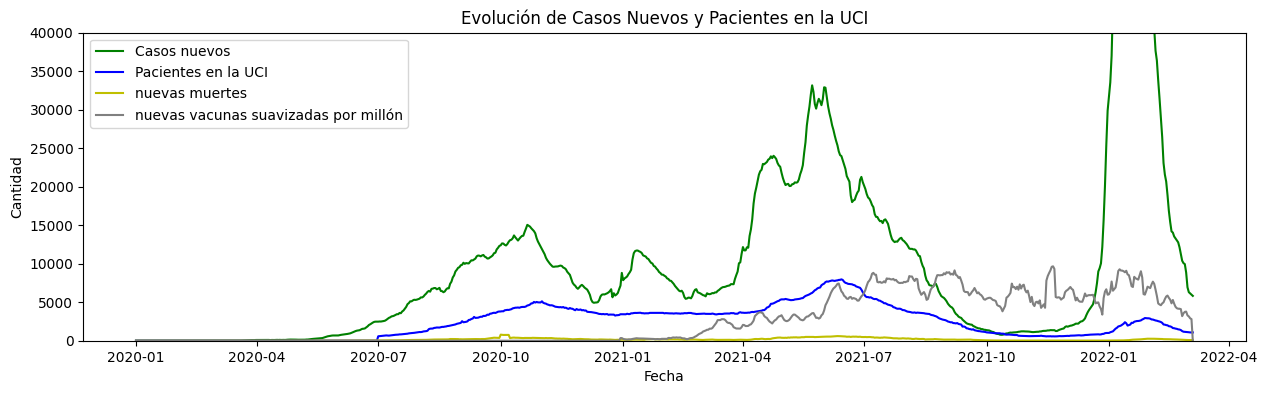

In [23]:
x = pd.to_datetime(covid_arg['fecha'])
y = covid_arg['nuevos casos suavizados']
y2 = covid_arg['Pacientes en la UCI']
y3 = covid_arg['nuevas muertes suavizadas']
y4 = covid_arg['nuevas  vacunas suavizadas por millón']
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x,y,c='g', label='Casos nuevos')
ax.plot(x,y2,c='b', label = 'Pacientes en la UCI')
ax.plot(x,y3,c='y', label = 'nuevas muertes')
ax.plot(x,y4,c='grey', label = 'nuevas vacunas suavizadas por millón')

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de Casos Nuevos y Pacientes en la UCI')
ax.set_ylim(0,40000)
ax.legend()

Sobre enero del año 2022 la curva de casos se eleva en forma muy alta (linea verde) pero el incremento de pacientes en terapias de alta complejidad (linea azul) no aumenta en la misma proporcion que se observa en junio del 2021. Graficando las muertes diaras en el mismo grafico y cambiando la escala para tener mejor visibilidad de valores

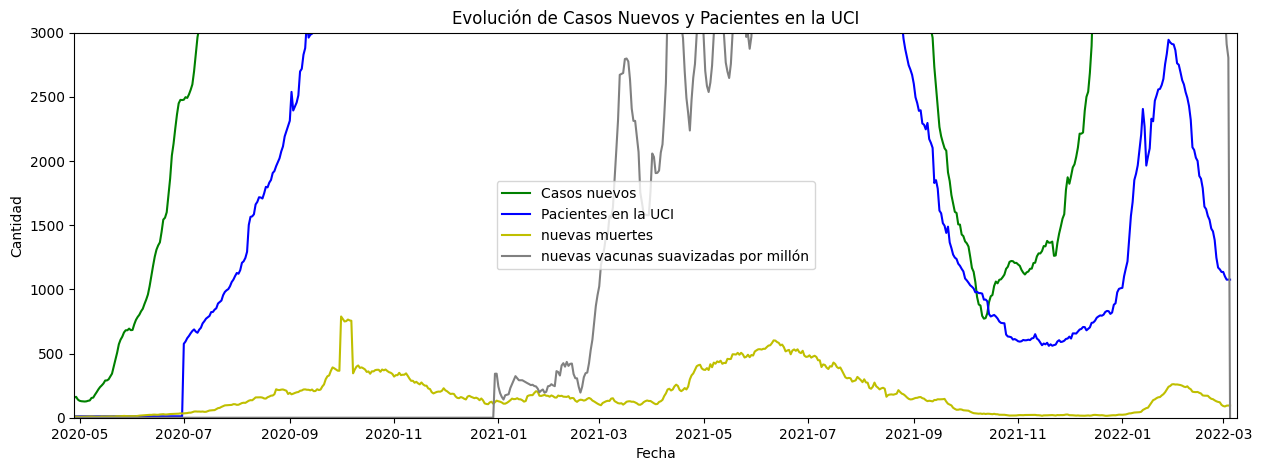

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x,y,c='g', label='Casos nuevos')
ax.plot(x,y2,c='b', label = 'Pacientes en la UCI')
ax.plot(x,y3,c='y', label = 'nuevas muertes')
ax.plot(x,y4,c='grey', label = 'nuevas vacunas suavizadas por millón')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de Casos Nuevos y Pacientes en la UCI')
ax.set_xlim(18380,19060)
ax.set_ylim(0,3000)
ax.legend()

Graficando solo las muertes diarias suavizadas

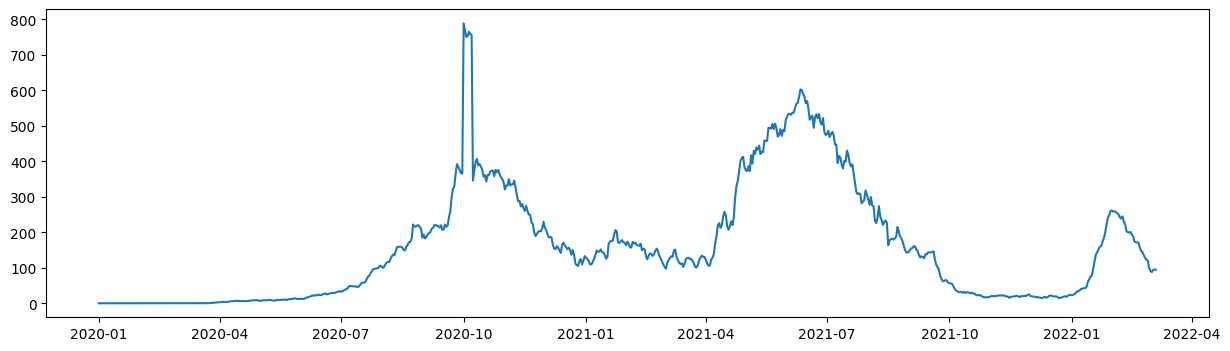

In [25]:
fig3, ax3=plt.subplots(figsize=(15,4))
ax3.plot(x,y3)
#plt.ylim(0,3500)

Tenemos un outlier ubicado en octubre del 2020. **importante crear una nueva columna que indique la relacion entre las muertes diarias respecto a los pacientes de UCI** (unidades de controles intensivos)

Mientras tanto seguimos visualizando datos, por ejemplo vamos a realizar un histograma que indique la cantidad de dias que se repitieron la misma cantidad de muertes sin incluir el valor "0" y sin incluir el outlier

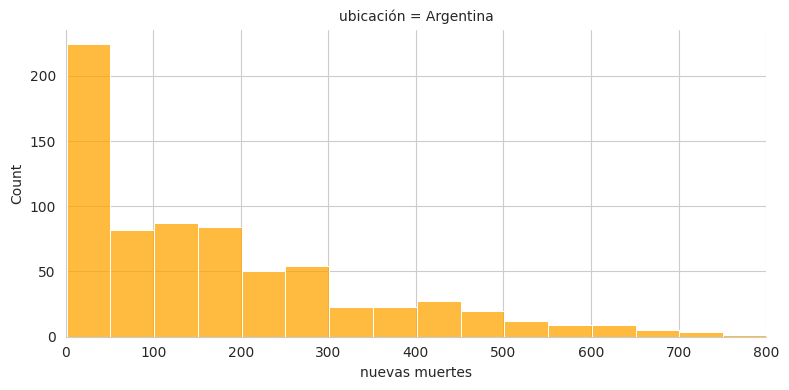

In [26]:
sns.set_style("whitegrid")
covid_arg = covid_arg[covid_arg['nuevas muertes'] != 0]
grafico = sns.displot(data=covid_arg,x='nuevas muertes',col='ubicación', height = 4, aspect=2, color='orange')
grafico.set(xlim=(0,800))

Si graficamos el total de casos (acumulado) y el total de muertes (acumulado) en funcion del tiempo
*  ¿el crecimiento es constante?
*  ¿existen mesetas?
*  ¿en que periodos de tiempos se dan estas mesetas?
*  ¿en el resto de los paises tambien suceden curvas similares?
*  ¿ambas curvas mantienen siempre la misma relacion?
*  ¿las medidas que se tomaron afectaron en forma significativa este crecimiento?

<Axes: xlabel='fecha', ylabel='casos totales'>

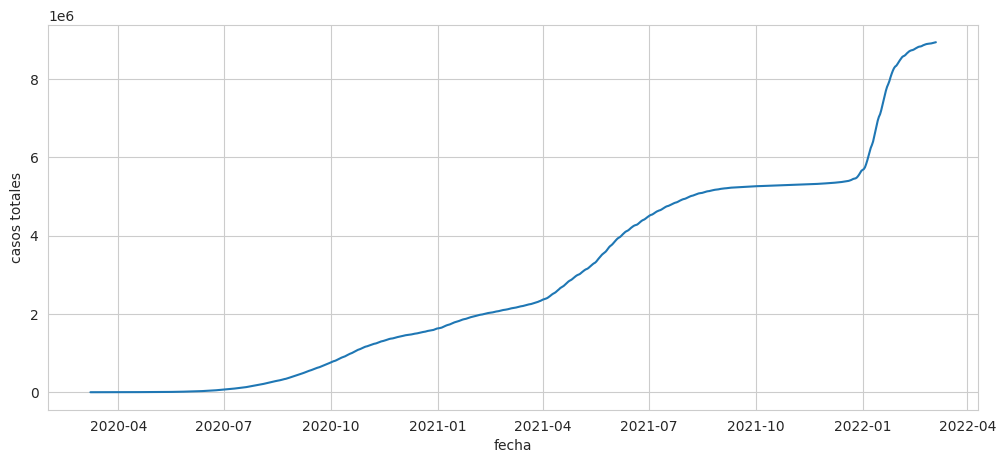

In [27]:
plt.figure(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x, y='casos totales')

<Axes: xlabel='fecha', ylabel='muertes totales'>

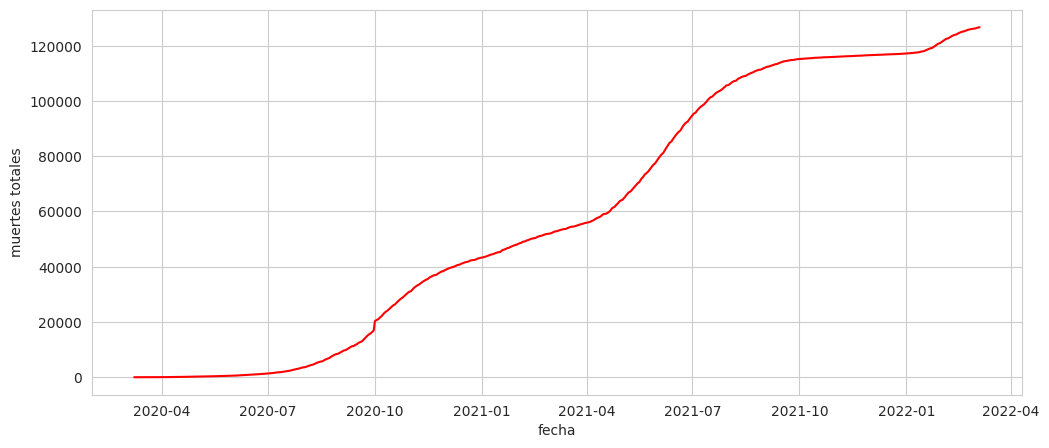

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x, y='muertes totales', color='red')

Centremonos inicialmente en la pregunta ¿ambas curvas mantienen siempre la misma relacion? y grafiquemos la relacion entre ambas

<Axes: xlabel='casos totales', ylabel='muertes totales'>

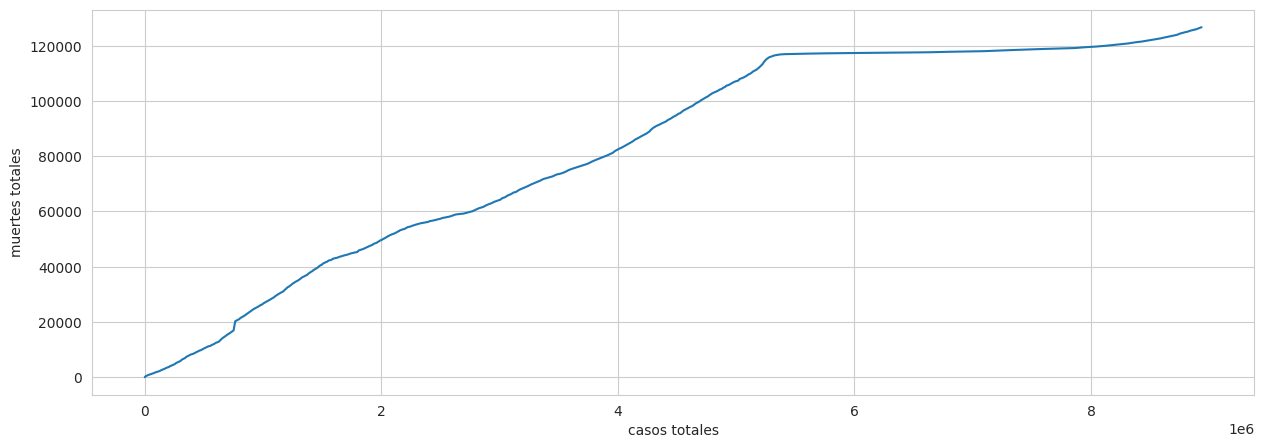

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(data=covid_arg, x='casos totales', y='muertes totales')

Aqui pareciera haber un cambio abrupto en la relacion entre cantidades pero es clave investigar si esta ruptura es causa de algun tipo de accion por parte del gobierno, por algun comportamiento normal del virus o nuestro outlier ya que existe un cambio claro en la relacion entre las cantidades. A pesar de que este grafico no incluye fecha, al ser valores acumulativos estan unidos a una linea temporal ya que ambas columnas no tienen valores negativos, solo crecen o se mantienen.

Text(0.5, 1.0, 'Muertes totales en funcion de los casos totales')

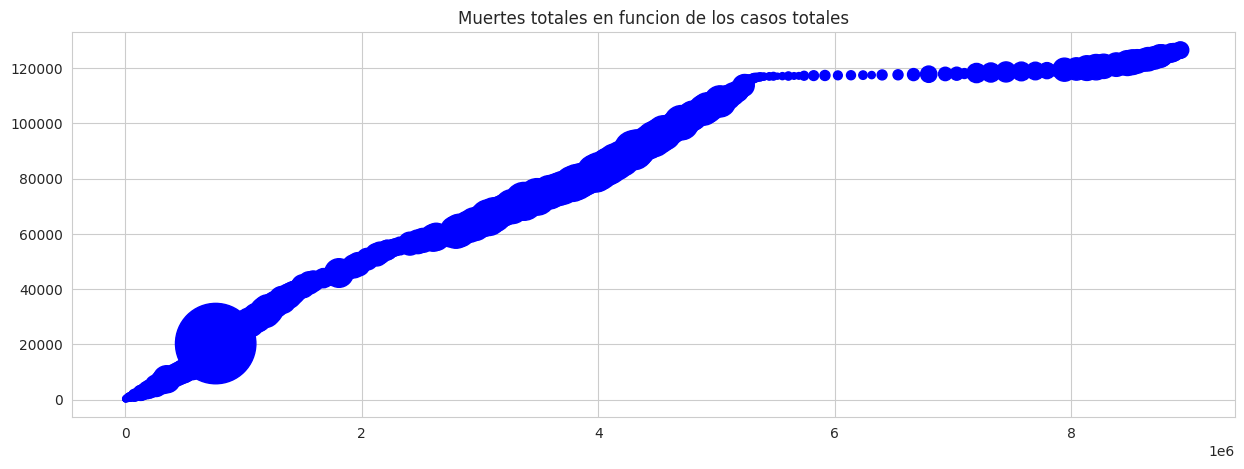

In [30]:
plt.figure(figsize=(15,5))
plt.scatter(data=covid_arg, x='casos totales', y='muertes totales', s = 'nuevas muertes', c='blue' )
plt.title('Muertes totales en funcion de los casos totales')

Viendo el grafico anterior, nuestro outlier de valor 3000 aprox. no es la causa del cambio de pendiente. Acerquemos mas el grafico para llegar al rango de fechas donde ocurre este evento. Tambien puede existir un blanqueo abrupto de casos totales, vamos a cambiar el valor "S" del grafico por "casos nuevos"

Text(0.5, 1.0, 'Muertes totales en funcion de los casos totales')

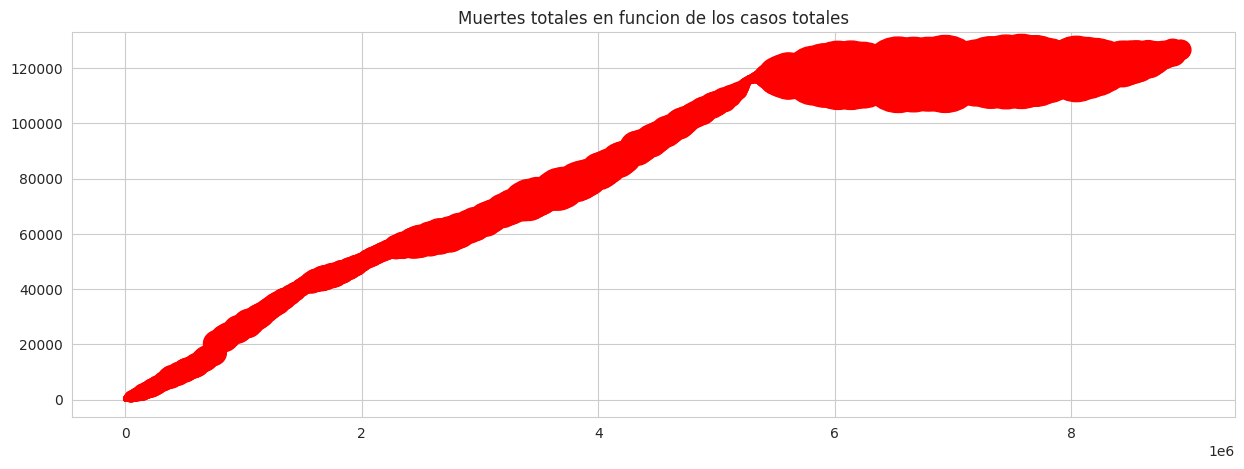

In [31]:
plt.figure(figsize=(15,5))
plt.scatter(data=covid_arg, x='casos totales', y='muertes totales', s = 'nuevos casos por millón', c='red' )
plt.title('Muertes totales en funcion de los casos totales')

Si observamos un poco otros paises

In [32]:
Francia_datos = covid[covid['ubicación']=='France']
Alemania_datos = covid[covid['ubicación']=='Germany']
Italia_datos = covid[covid['ubicación']=='Italy']
España_datos = covid[covid['ubicación']=='Spain']

xf=pd.to_datetime(Francia_datos['fecha'])
xa=pd.to_datetime(Alemania_datos['fecha'])
xi=pd.to_datetime(Italia_datos['fecha'])
xe=pd.to_datetime(España_datos['fecha'])

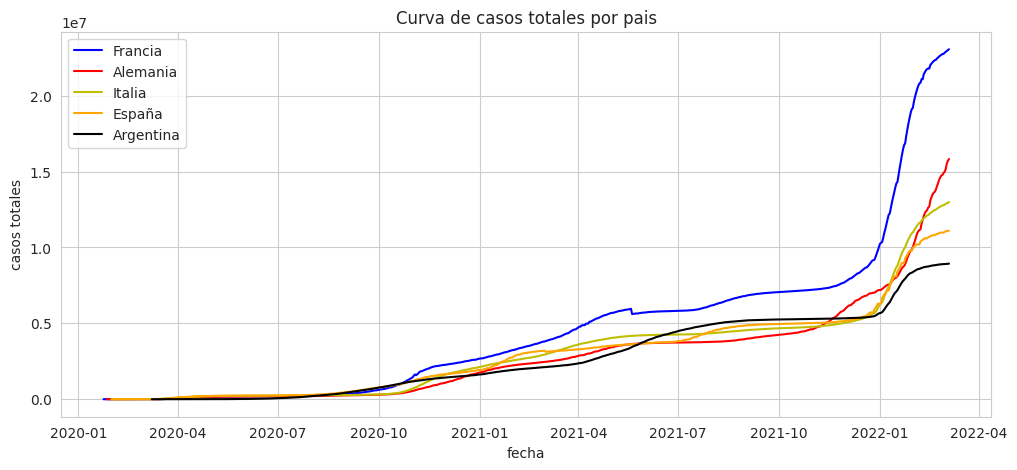

In [33]:
plt.subplots(figsize = (12,5))
sns.lineplot(data=Francia_datos, x=xf, y='casos totales',  color='blue', label='Francia')
sns.lineplot(data=Alemania_datos, x=xa, y='casos totales',  color ='red', label= 'Alemania')
sns.lineplot(data=Italia_datos, x=xi, y='casos totales', color = 'y', label = 'Italia')
sns.lineplot(data=España_datos, x=xe, y='casos totales', color = 'orange', label = 'España')
sns.lineplot(data=covid_arg, x=x, y='casos totales', color = 'black', label = 'Argentina')
plt.title('Curva de casos totales por pais')
plt.legend()


Se puede observar que el comportamiento de los 4 paises de europa en cantidad de casos en funcion de la fecha es similar.
Otro punto que llama la atencion es que las curvas sigan en forma muy temporal cada crecimiento y estancamiento ya que argentina se encuentra en el polo sur, teniendo las estaciones separadas por 6 meses de europa, el eje X no deberia ser el mismo para cada uno de los paises.
Realicemos un scatter entre los casos de covid y las muertes (valores acumulados).

Text(0.5, 1.0, 'Muertes totales en funcion de los casos totales')

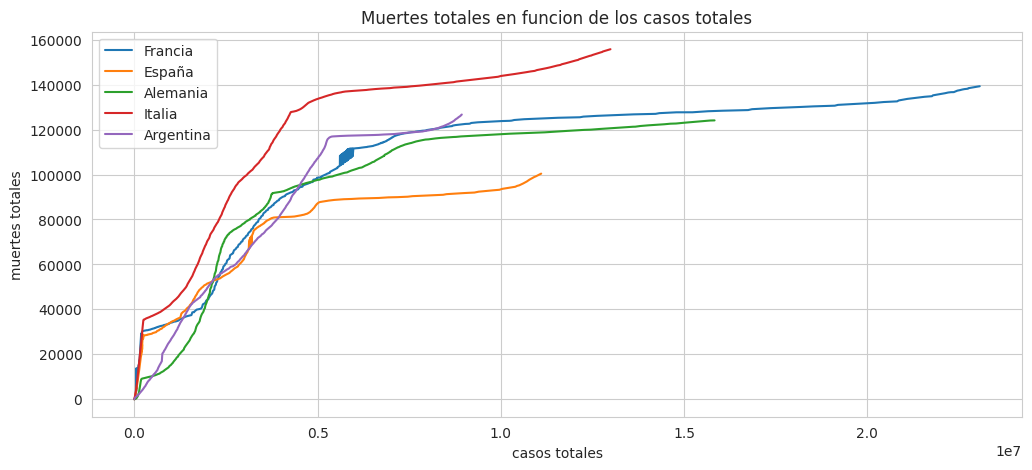

In [34]:
plt.subplots(figsize = (12,5))
sns.lineplot (data=Francia_datos, x = 'casos totales', y = 'muertes totales',label='Francia')
sns.lineplot (data=España_datos, x = 'casos totales', y = 'muertes totales', label = 'España')
sns.lineplot (data=Alemania_datos, x = 'casos totales', y = 'muertes totales', label='Alemania')
sns.lineplot (data=Italia_datos, x = 'casos totales', y = 'muertes totales', label = 'Italia')
sns.lineplot (data=covid_arg, x = 'casos totales', y = 'muertes totales', label = 'Argentina')
plt.legend()
plt.title ('Muertes totales en funcion de los casos totales')

Vamos a ver la parte gruesa de la linea de francia

(100000.0, 115000.0)

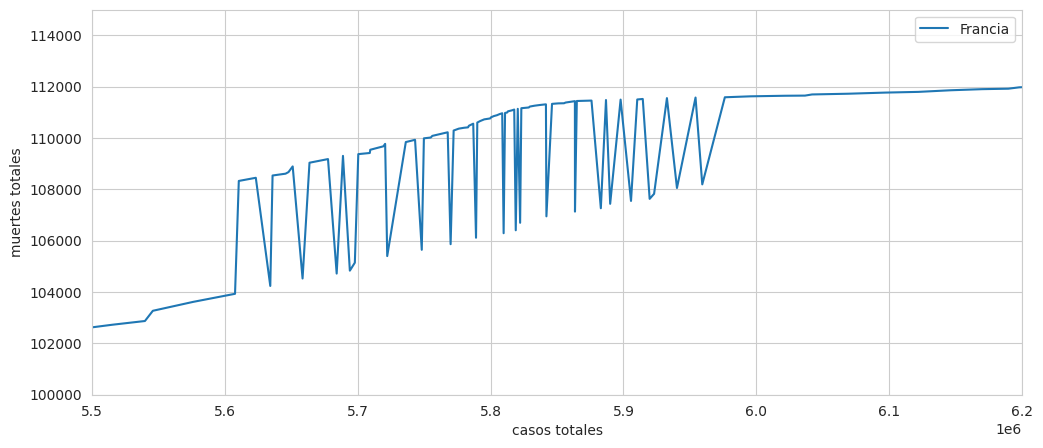

In [35]:
plt.subplots(figsize = (12,5))
sns.lineplot (data=Francia_datos, x = 'casos totales', y = 'muertes totales',label='Francia')
plt.xlim(5500000,6200000)
plt.ylim(100000,115000)

Claramente existe un error en la carga de datos pero no nos vamos a denter en la correccion ya que luego de este lapso las curvas continuan sin inconvenientes

La cantidad de muertes totales en funcion de los casos totales tiene curvas similares en todos los paises

Tenemos un puntapie para responder una de las preguntas que nos hicimos inicialmente, la cuarta pregunta de esta lista

*   ¿Podremos crear un modelo que prediga muertes?
*   ¿Podremos crear un modelo que prediga contagios?
*   ¿Existen medidas eficaces para disminuir la velocidad de contagios?¿Cuales fueron?
*   ¿Mediante el analisis de datos, es posible encontrar cuales son las medidas mas efectivas para evitar muertes?
*   `¿Es posible utilizar la experiencia de paises que sufrieron inicialmente la enfermedad para predecir el comportamiento en Argentina?`

En un primer momento parece posible, ya que viendo las tendencias de las curvas estas se comportan de manera similar, y justamente los paises a los que durante la pandemia les sucedian primero los eventos que luego pasarian en Argentina

Sigamos graficando: Scatter trivariable entre las muertes y la tasa de vacunacion por cada pais

Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

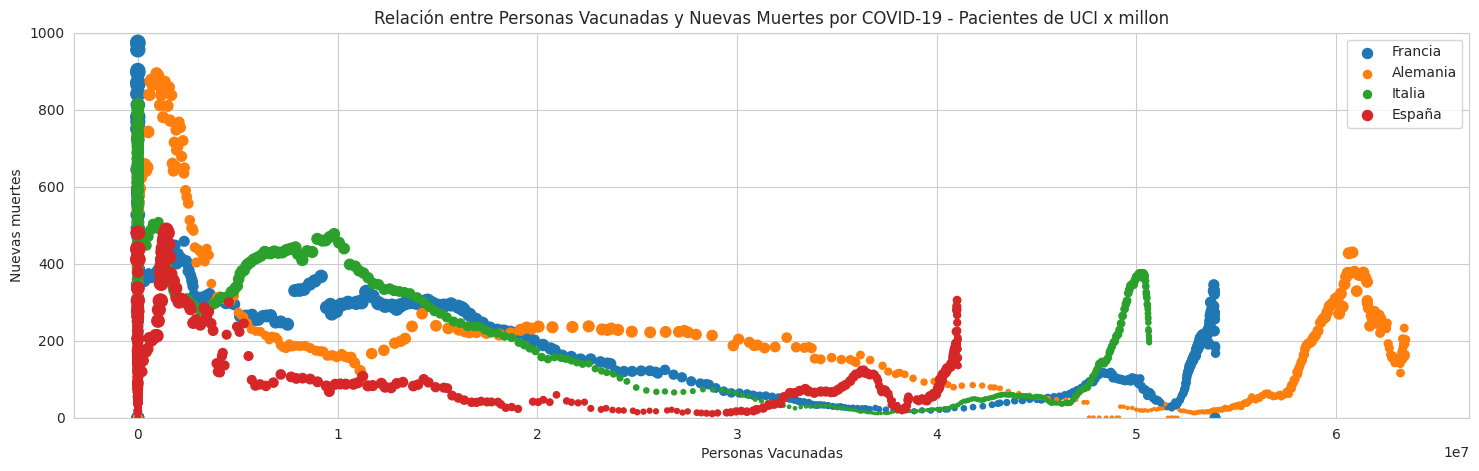

In [36]:
plt.figure(figsize=(18, 5))
plt.scatter(data=Francia_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=Alemania_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=Italia_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=España_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
tipo= covid['personas vacunadas'].dtype
tipo2=covid['nuevas muertes'].dtype
plt.legend(['Francia', 'Alemania', 'Italia', 'España'])
plt.xlabel('Personas Vacunadas')
plt.ylabel('Nuevas muertes')
plt.ylim(0,1000)
plt.title('Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

Es clave *normalizar la cantidad de personas vacunadas* para realizar una comparativa de comportamiento ya que en cada pais la cantidad de personas vacunadas es diferente pero el comportamiento de la cantidad de personas vacunadas vs nuevas muertes parece similar. Se vienen observando patrones de comportamiento entre paises y entre relaciones de variables

In [37]:
# normalizacion de personas vacunadas

maxfrancia = max(Francia_datos['personas vacunadas'])
maxalemania = max(Alemania_datos['personas vacunadas'])
maxitalia = max(Italia_datos['personas vacunadas'])
maxespaña = max(España_datos['personas vacunadas'])

maxfrancia_nv = max(Francia_datos['nuevas muertes suavizadas'])
maxalemania_nv = max(Alemania_datos['nuevas muertes suavizadas'])
maxitalia_nv = max(Italia_datos['nuevas muertes suavizadas'])
maxespaña_nv = max(España_datos['nuevas muertes suavizadas'])

Francia_datos['personas vacunadas normalizada'] = Francia_datos['personas vacunadas']/maxfrancia
Alemania_datos['personas vacunadas normalizada'] = Alemania_datos['personas vacunadas']/maxalemania
Italia_datos['personas vacunadas normalizada'] = Italia_datos['personas vacunadas']/maxitalia
España_datos['personas vacunadas normalizada'] = España_datos['personas vacunadas']/maxespaña

Francia_datos['nuevas muertes normalizada'] = Francia_datos['nuevas muertes suavizadas']/maxfrancia_nv
Alemania_datos['nuevas muertes normalizada'] = Alemania_datos['nuevas muertes suavizadas']/maxalemania_nv
Italia_datos['nuevas muertes normalizada'] = Italia_datos['nuevas muertes suavizadas']/maxitalia_nv
España_datos['nuevas muertes normalizada'] = España_datos['nuevas muertes suavizadas']/maxespaña_nv


Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

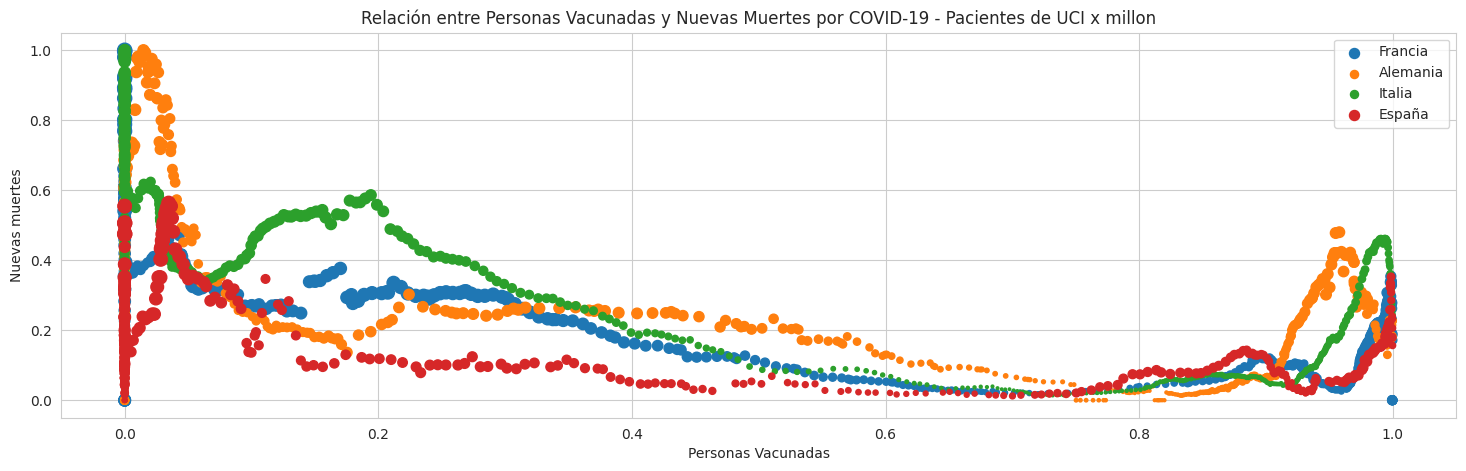

In [38]:
plt.figure(figsize=(18, 5))
plt.scatter(data=Francia_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes normalizada', s= 'Pacientes de UCI por millón')
plt.scatter(data=Alemania_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes normalizada', s= 'Pacientes de UCI por millón')
plt.scatter(data=Italia_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes normalizada', s= 'Pacientes de UCI por millón')
plt.scatter(data=España_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes normalizada', s= 'Pacientes de UCI por millón')
tipo= covid['personas vacunadas'].dtype
tipo2=covid['nuevas muertes'].dtype
plt.legend(['Francia', 'Alemania', 'Italia', 'España'])
plt.xlabel('Personas Vacunadas')
plt.ylabel('Nuevas muertes')
#plt.ylim(0,1000)
plt.title('Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

Vemos la similitud de las curvas al normalizar las personas vacunadas

Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19')

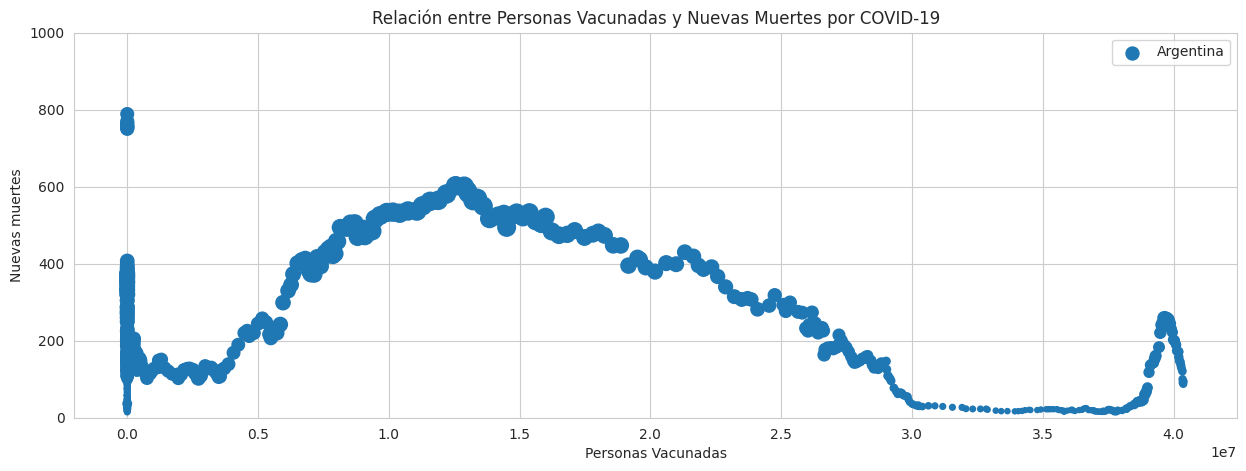

In [39]:
plt.figure(figsize=(15, 5))
plt.scatter(data=covid_arg, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.legend(['Argentina'])
plt.xlabel('Personas Vacunadas')
plt.ylabel('Nuevas muertes')
plt.ylim(0,1000)
plt.title('Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19')

Durante la epoca de vacunacion baja tenemos gran cantidad de personas en UCI independientemente de la cantidad de muertes, en cambio cuando la vacunacion supera 2.5 del eje X ya el tamaño de circulos disminuye notablemente

Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Pacientes de UCI x millon')

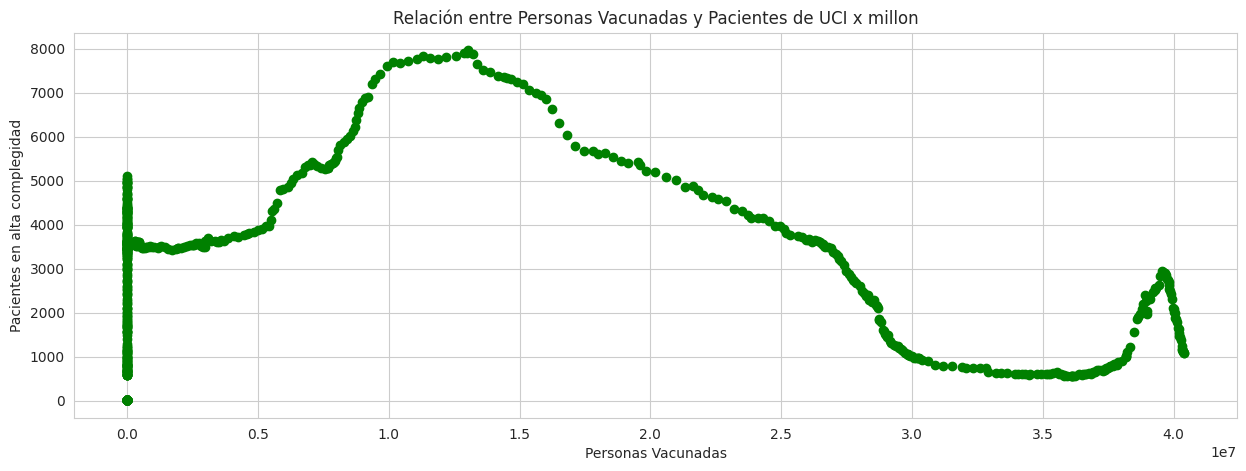

In [40]:
plt.subplots(figsize=(15,5))
plt.scatter(data=covid_arg, x='personas vacunadas', y='Pacientes en la UCI', c='g')
plt.xlabel ('Personas Vacunadas')
plt.ylabel ('Pacientes en alta complegidad')
plt.title('Relación entre Personas Vacunadas y Pacientes de UCI x millon')

Vemos que ambas curvas anteriores tienen tendencias similares, vamos a crear un grafico entre los pacientes que estan en alta complegidad y las nuevas muertes

Text(0.5, 1.0, 'Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

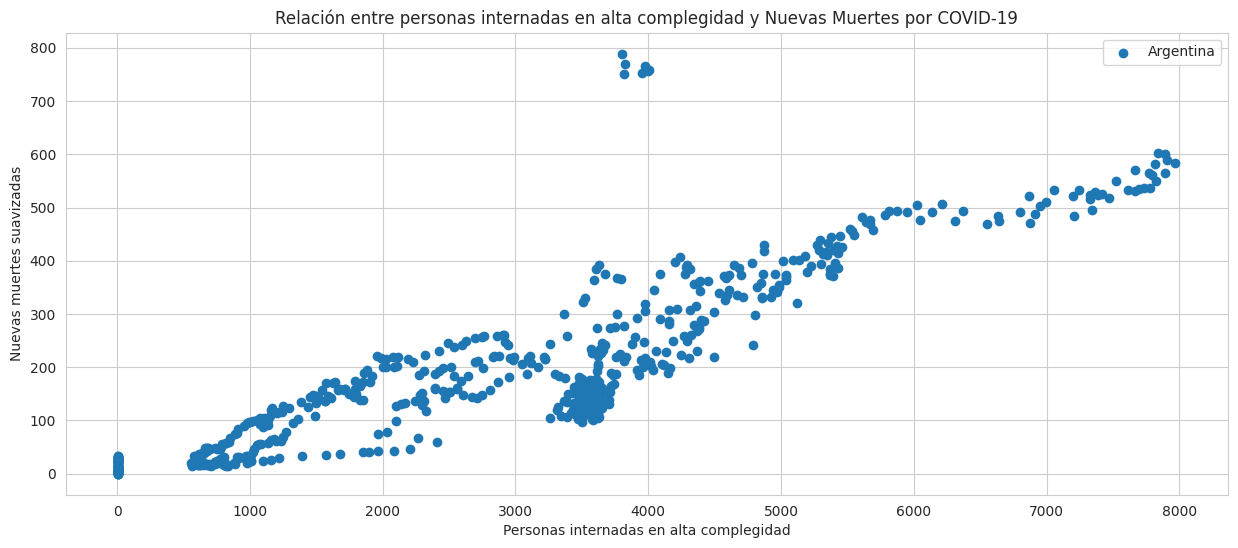

In [41]:
plt.figure(figsize=(15, 6))
plt.scatter(data=covid_arg, x= 'Pacientes en la UCI', y = 'nuevas muertes suavizadas')
plt.legend(['Argentina'])
plt.xlabel('Personas internadas en alta complegidad')
plt.ylabel('Nuevas muertes suavizadas')

plt.title('Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

Eliminaremos del dataset original las lineas con outlier donde "Nuevas muertes suavizadas sean mayores a 700".

In [42]:
covid_arg=covid_arg[covid_arg['nuevas muertes suavizadas']<=700]

Text(0.5, 1.0, 'Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

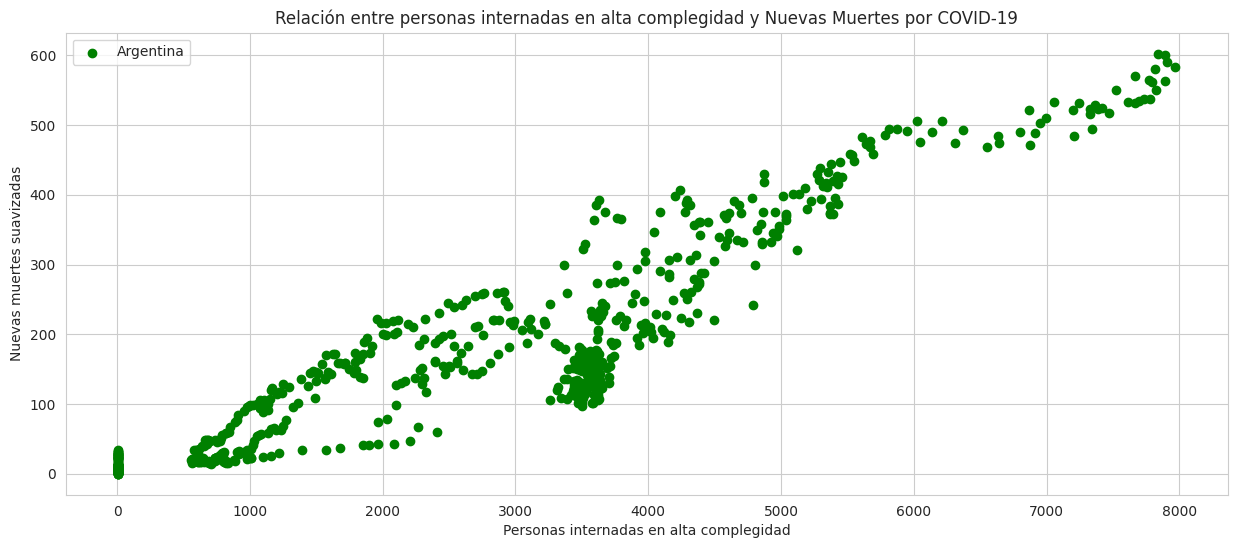

In [43]:
plt.figure(figsize=(15, 6))
plt.scatter(data=covid_arg, x= 'Pacientes en la UCI', y = 'nuevas muertes suavizadas',c='g')
plt.legend(['Argentina'])
plt.xlabel('Personas internadas en alta complegidad')
plt.ylabel('Nuevas muertes suavizadas')

plt.title('Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

Vamos a crear Columnas que tenga relacion entre variables

*   % de vacunados vs poblacion
*   Relacion entre muertes y casos
*   Muertes vs casos
*   Muertes vs pacientes de UCI

Vamos a crear algunas columnas que nos pueden darle valor al estudio.
Importante crear una nueva columna que indique la relacion entre las muertes diarias respecto a los pacientes de UCI

In [44]:
covid_arg['% de vacunados']=covid_arg['vacunas totales']/covid_arg['población']
covid_arg['% muertes']=covid_arg['nuevas muertes suavizadas']/covid_arg['población']
covid_arg['Muertes vs casos'] = covid_arg['nuevas muertes suavizadas']/covid_arg['casos nuevos']
covid_arg['Muertes vs pacientes UCI'] = covid_arg['nuevas muertes suavizadas']/covid_arg['Pacientes en la UCI']
covid_arg['Muertes vs casos'].fillna(0)
covid_arg['Muertes vs pacientes UCI'].fillna(0)
print('tarea finalizada')

tarea finalizada


En el siguiente grafico vamos a ver las nuevas muertes en funcion de los casos nuevos, pero a su vez pintaremos de color diferente cuando el % de vacunados sea el 0%, el 1% y el 2%

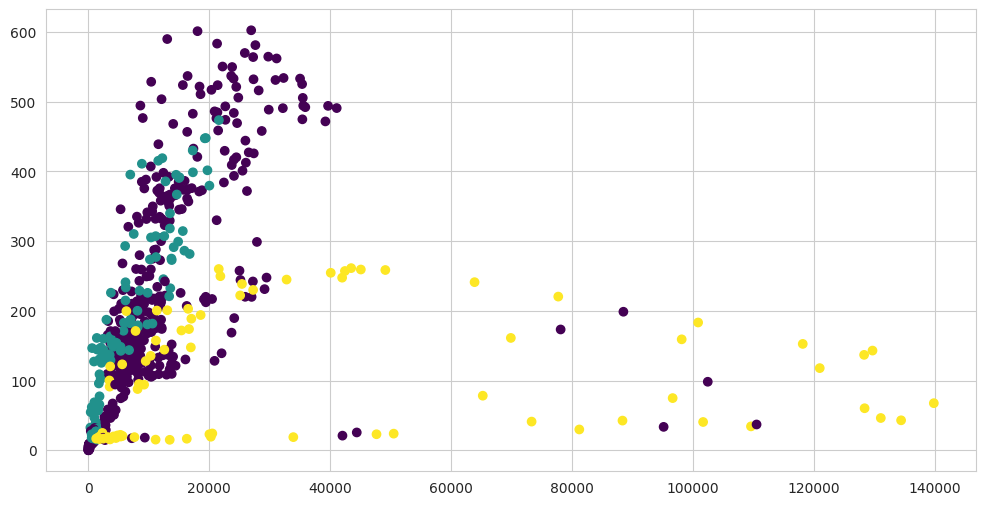

In [45]:
covid_arg['% de vacunados redondeado'] = covid_arg['% de vacunados'].round(decimals=0)
c=covid_arg['% de vacunados redondeado']
plt.subplots(figsize =(12,6))
plt.scatter(data=covid_arg, x='casos nuevos', y='nuevas muertes suavizadas', c=c, cmap='viridis')

Tener o no vacunas?. Veamos el comportamiento de los graficos cuando dividimos el dataset en personas sin vacunar y vacunadas, en que % de poblacion vacunada comienza a cambiar la tendencia de crecimiento de muertes. Para ello tenemos que crear una columna que indique el % de personas vacunadas y luego un crecimiento de las muertes, pero de las muertes en funcion de personas contagiadas.

In [46]:
porc_vacc=0
covid_arg_zero = covid_arg[covid_arg['% de vacunados']<=porc_vacc]
covid_arg_vacc = covid_arg[covid_arg['% de vacunados']>porc_vacc]

Text(0.5, 1.0, '% de muertes con personas sin vacunar')

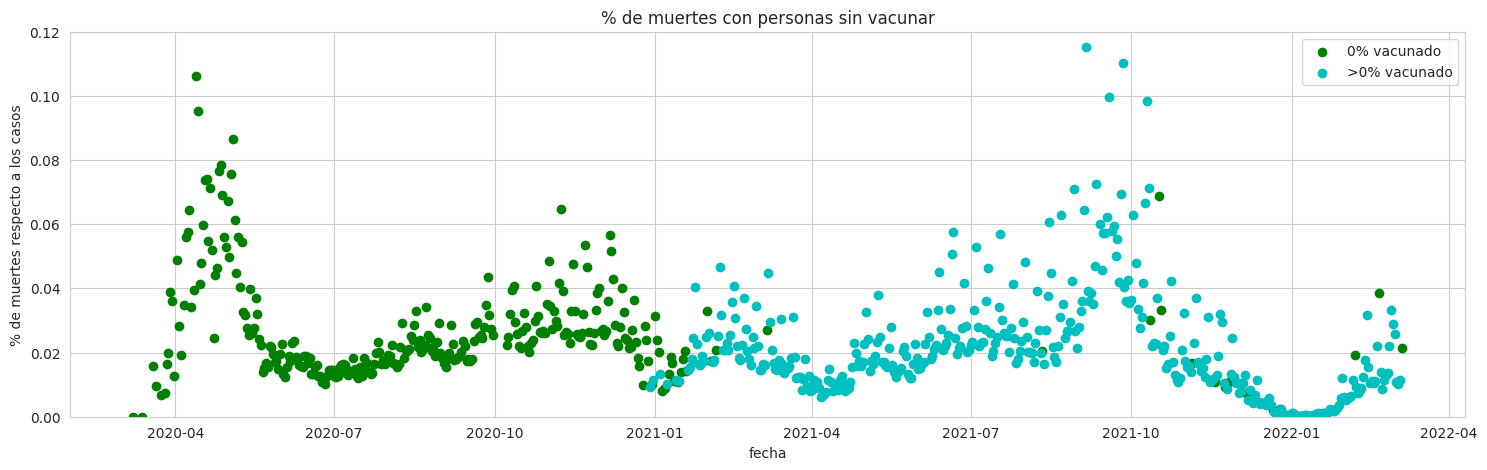

In [47]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg_zero, x= 'fecha', y = 'Muertes vs casos',c='g', label ='0% vacunado')
plt.scatter(data=covid_arg_vacc, x= 'fecha', y = 'Muertes vs casos',c='c', label ='>0% vacunado' )
plt.legend()
plt.xlabel('fecha')
plt.ylabel('% de muertes respecto a los casos')
plt.ylim(0,0.12)
plt.title('% de muertes con personas sin vacunar')

Mirando las escalas de Y, el % de muertes disminuye levemente cuando aumentan las personas vacunadas pero tampoco es tan clara la tendencia

# Preparacion de datos
Vamos a limpiar y procesar los datos, en el caso de valores faltantes ya los completamos con '0', tenemos que tratar el valor atipico del dataset covid_arg y los datos inconsistentes
*   En el tratamiento del dato atipico encontrado, vamos a ubicar el valor maximo (que es el dato atipico) y eliminar esa fila

Metodo IQR

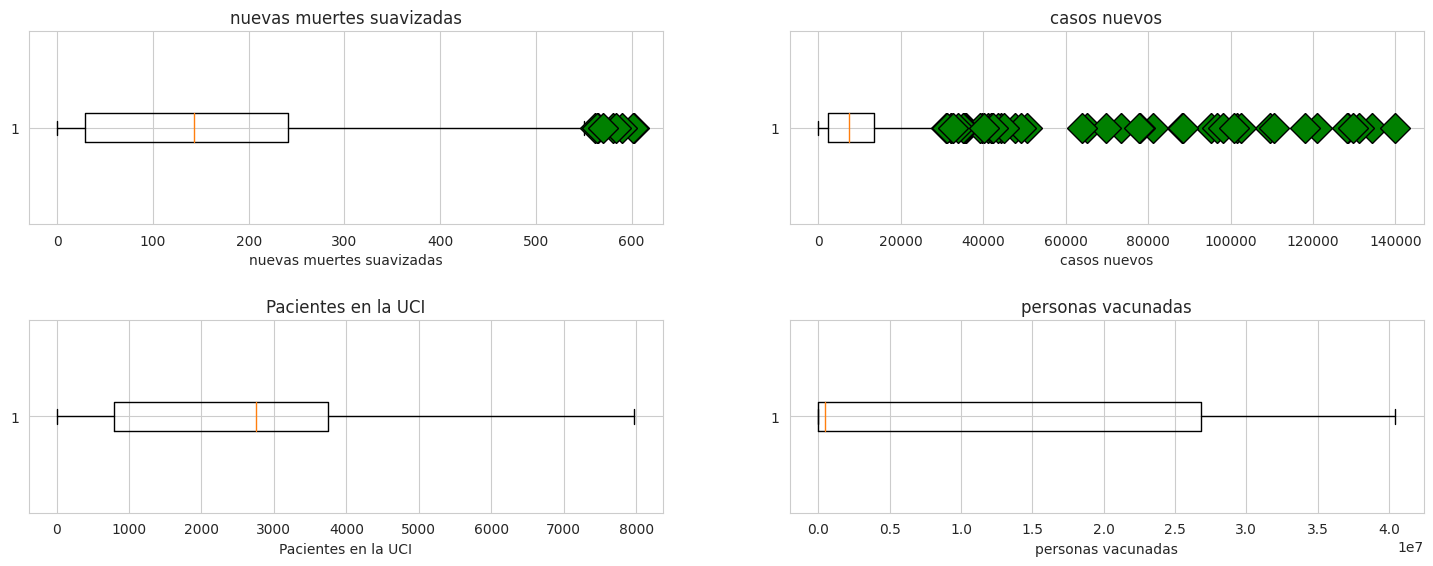

In [48]:
columnas = ['nuevas muertes suavizadas', 'casos nuevos', 'Pacientes en la UCI', 'personas vacunadas']
plt.figure(figsize=(18, 10))
for x in range(len(columnas)):
  plt.subplot(3,2,x+1)
  plt.boxplot(covid_arg[columnas[x]], vert=False, flierprops=dict(markerfacecolor='g', marker='D', markersize=15))
  plt.xlabel(columnas[x])
  plt.title(columnas[x])
plt.subplots_adjust(hspace=0.5)

Metodo Objetivo

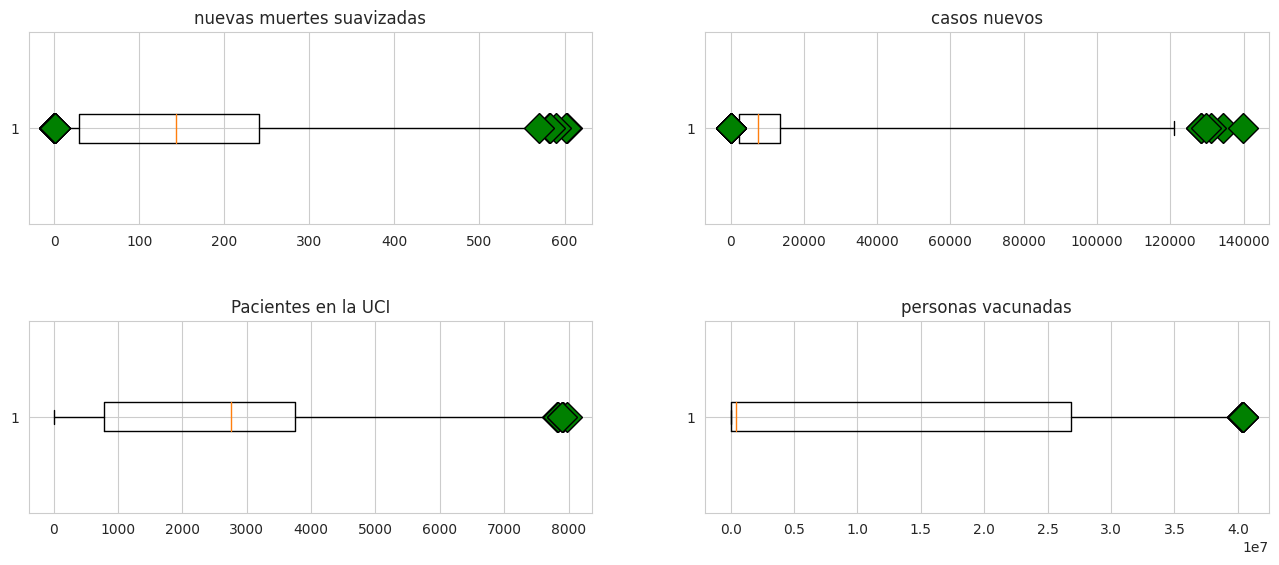

In [49]:
columnas = ['nuevas muertes suavizadas', 'casos nuevos', 'Pacientes en la UCI', 'personas vacunadas']
plt.figure(figsize=(16, 10))
for x in range(len(columnas)):
  plt.subplot(3,2,x+1)
  plt.boxplot(covid_arg[columnas[x]], vert=False, whis=[1,99.2],flierprops=dict(markerfacecolor='g', marker='D', markersize=15))
  plt.xlabel('')
  plt.title(columnas[x])
plt.subplots_adjust(hspace=0.5)

Metodo Z-score para 'nuevas muertes'

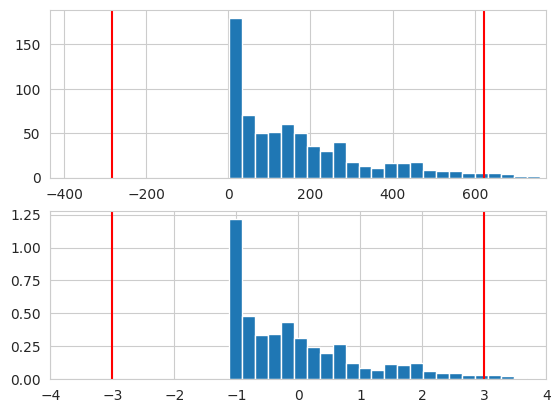

In [50]:
media = covid_arg['nuevas muertes suavizadas'].mean()
desvio = covid_arg['nuevas muertes suavizadas'].std()
var_normalizada = (covid_arg['nuevas muertes']-media)/desvio
percentile1 = stats.percentileofscore(var_normalizada, -3.5)
percentile2 = stats.percentileofscore(var_normalizada, 3.5)

plt.figure()
plt.subplot(2,1,1)
plt.hist(covid_arg['nuevas muertes'], 25)
plt.xlim(media-4*desvio, media+4*desvio)
plt.axvline(media-3*desvio, color='r')
plt.axvline(media+3*desvio, color='r')
plt.subplot(2,1,2)
plt.hist(var_normalizada, 25, density=True)
plt.xlim(-4,4)
plt.axvline(-3, color='r')
plt.axvline(3, color='r')

Los valores del dataset son descripcion de un problema y son valores consecuentes de condiciones. Por este motivo se utilizaron los metodos para detectar y limitar los valores 'Outlier' pero no se aplicaron las condiciones encontradas. La unica eliminacion de outlier fue manual y fue aplicada en un paso anterior en la variable "nuevas muertes".

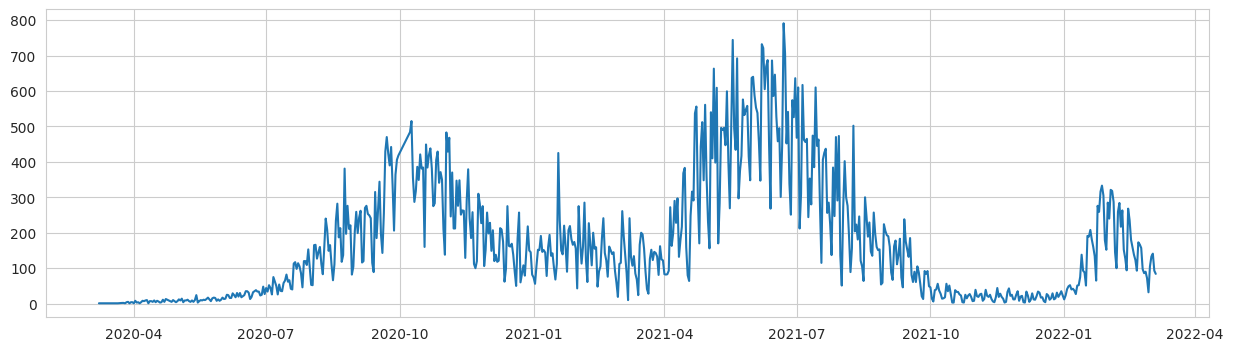

In [51]:
x3=covid_arg['fecha']
y3=covid_arg['nuevas muertes']
fig3, ax3=plt.subplots(figsize=(15,4))
ax3.plot(x3,y3)
#plt.ylim(0,1000)

Text(0.5, 1.0, 'Relacion entre los casos y las muertes x covid')

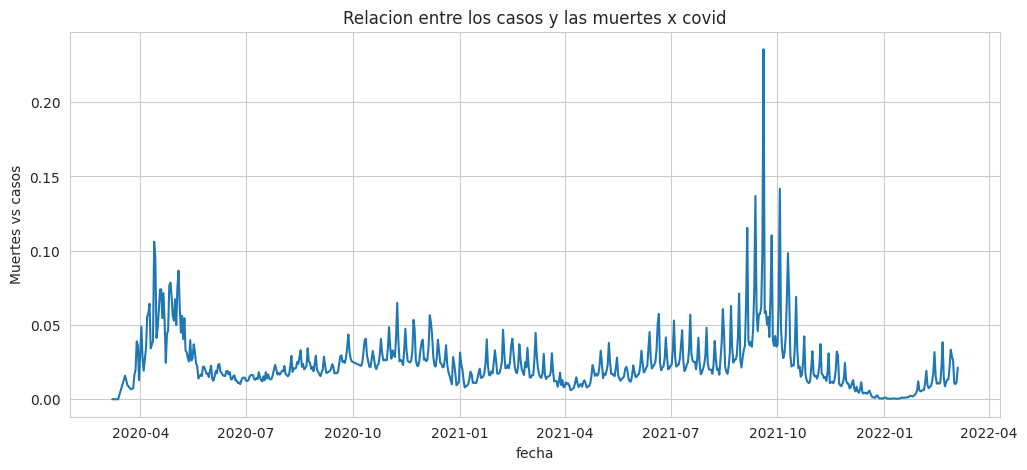

In [52]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs casos')
plt.title('Relacion entre los casos y las muertes x covid')

In [53]:
covid_arg['Muertes vs casos'].fillna(0, inplace = True)
covid_arg['Muertes vs casos'].describe()

count    708.000000
mean            inf
std             NaN
min        0.000000
25%        0.013781
50%        0.020583
75%        0.029299
max             inf
Name: Muertes vs casos, dtype: float64

<Axes: xlabel='fecha', ylabel='Muertes vs pacientes UCI'>

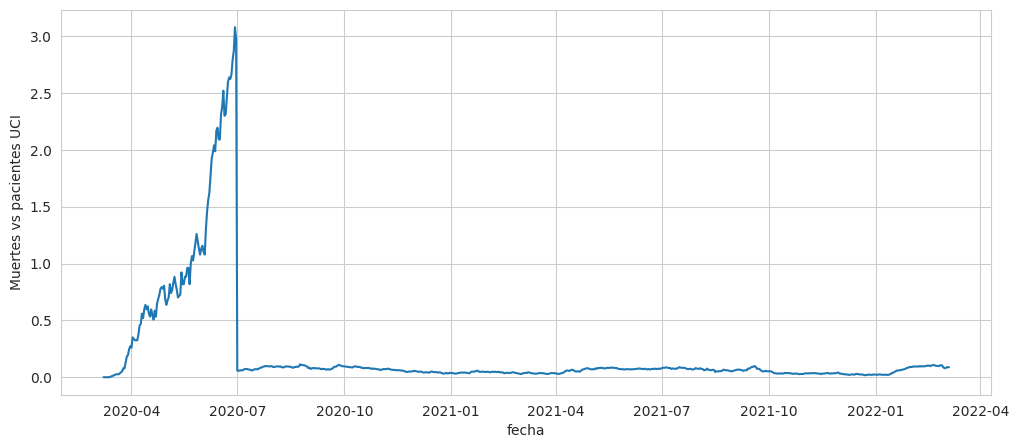

In [54]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs pacientes UCI')

(0.0, 0.125)

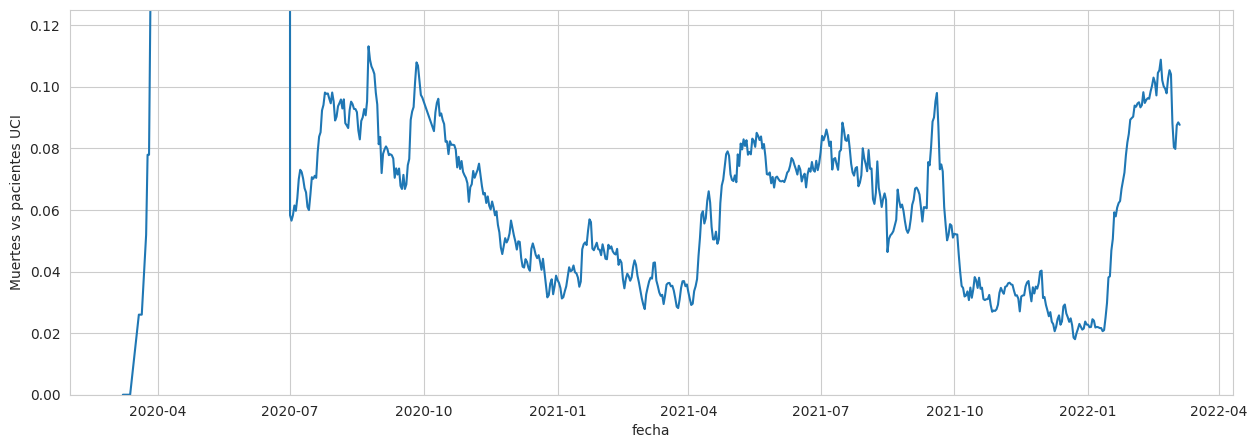

In [55]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs pacientes UCI')
plt.ylim(0,0.125)

Que paso en Julio del 2020?

<Axes: xlabel='fecha', ylabel='Pacientes en la UCI'>

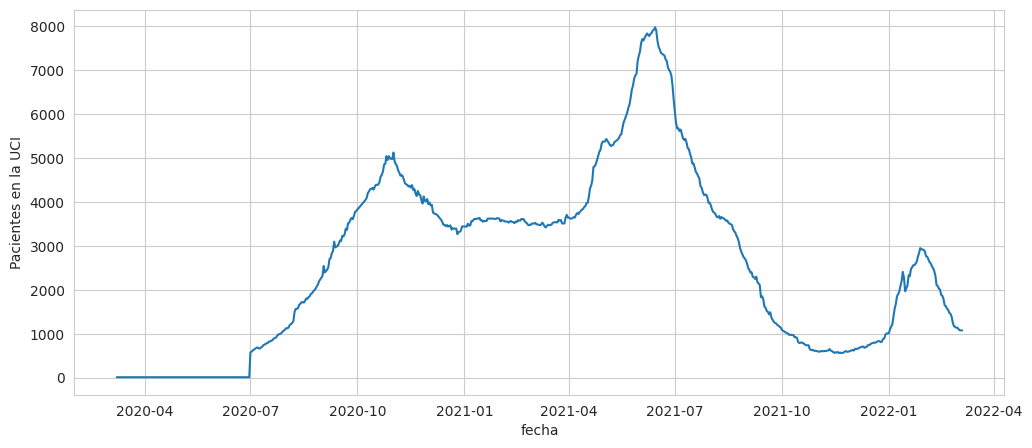

In [56]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Pacientes en la UCI')

Observemos el comportamiento mas a detalle luego de julio del 2020

In [57]:
covid_arg['Muertes vs vacunados'] = covid_arg['nuevas muertes suavizadas']/covid_arg['nuevas  vacunas']
covid_arg['Muertes vs vacunados'].fillna(0)
covid_arg['Muertes vs vacunados']=covid_arg['Muertes vs vacunados'].replace('inf',0)
covid_arg['Muertes vs vacunados'].describe()

count    706.000000
mean            inf
std             NaN
min        0.000012
25%        0.000904
50%        0.095909
75%             NaN
max             inf
Name: Muertes vs vacunados, dtype: float64

(0.0, 0.015)

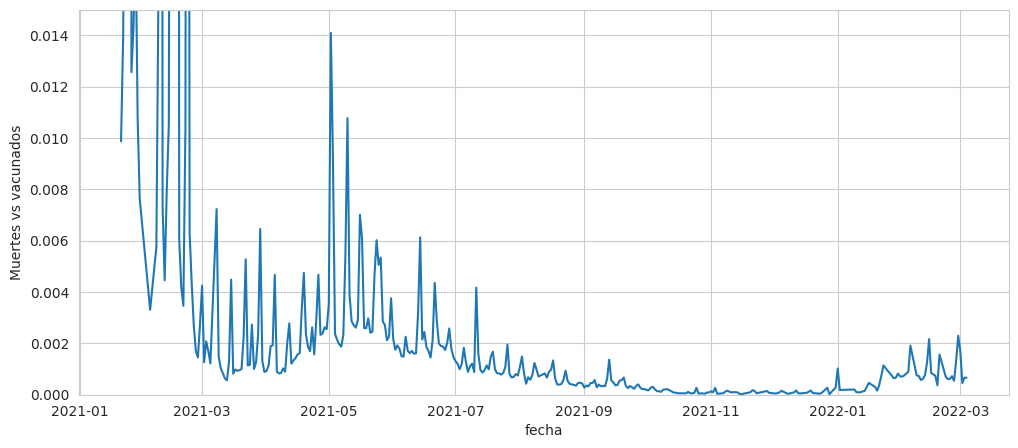

In [58]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs vacunados')
plt.ylim(0,0.015)

Busquemos valores duplicados

In [59]:
covid.shape

(166326, 67)

In [60]:
covid.drop_duplicates()
covid.shape

(166326, 67)

In [61]:
extra.shape

(155585, 56)

In [62]:
extra.drop_duplicates()
extra.shape

(155585, 56)

No se encontraron valores duplicandos en ninguna de los dataset

Vamos a preparar el dataset EXTRA para realizar la union con COVID mediante la herramienta "Merge"

In [63]:
extra['Fecha'] = pd.to_datetime(extra['Fecha'], format='%Y%m%d')

In [64]:
extra_arg = extra[extra['NombrePaís']=='Argentina']

In [65]:
extra_arg['Fecha']=pd.to_datetime(extra_arg['Fecha'])
covid_arg['Fecha']=pd.to_datetime(covid_arg['fecha'])

In [66]:
big_covid_arg=pd.merge(covid_arg,extra_arg, on=['Fecha'])
big_covid_arg.describe()

casos totales   casos nuevos  nuevos casos suavizados  muertes totales  \
count   7.080000e+02     708.000000               708.000000       708.000000   
mean    2.952014e+06   12491.775424             12458.570623     60848.504237   
std     2.517331e+06   19723.391216             18894.199708     45576.394868   
min     1.200000e+01       0.000000                 0.000000         1.000000   
25%     5.532730e+05    2253.500000              2141.607000     11329.750000   
50%     2.214273e+06    7347.500000              7131.857000     54133.500000   
75%     5.219697e+06   13478.500000             13300.000000    113144.750000   
max     8.934328e+06  139853.000000            114018.143000    126708.000000   

       nuevas muertes  nuevas muertes suavizadas  casos totales por millón  \
count      708.000000                 708.000000                708.000000   
mean       171.495763                 170.822831              64728.881113   
std        166.836142                 150.973157              55197.578072   
min          1.000000                   0.000000                  0.263000   
25%         31.000000                  29.214500              12131.630250   
50%        130.000000                 143.214500              48552.418000   
75%        257.000000                 241.035750             114452.424500   
max        791.000000                 602.429000             195903.229000   

       nuevos casos por millón  nuevos casos suavizados por millón  \
count               708.000000                          708.000000   
mean                273.907483                          273.179391   
std                 432.475262                          414.293591   
min                   0.000000                            0.000000   
25%                  49.412500                           46.958750   
50%                 161.108500                          156.380500   
75%                 295.543750                          291.629750   
max                3066.560000                         2500.079000   

       muertes totales por millón  ...  \
count                  708.000000  ...   
mean                  1334.226644  ...   
std                    999.354713  ...   
min                      0.022000  ...   
25%                    248.428000  ...   
50%                   1186.986500  ...   
75%                   2480.928000  ...   
max                   2778.329000  ...   

       V2G_Trabajadores de primera línea (atención sanitaria)  \
count                                         708.000000        
mean                                            1.759887        
std                                             0.427454        
min                                             1.000000        
25%                                             2.000000        
50%                                             2.000000        
75%                                             2.000000        
max                                             2.000000        

       V3_Apoyo financiero para vacunas (resumen)  \
count                                  708.000000   
mean                                     3.050847   
std                                      2.440282   
min                                      0.000000   
25%                                      0.000000   
50%                                      5.000000   
75%                                      5.000000   
max                                      5.000000   

       V4_Vacunación Obligatoria (resumen)  CasosConfirmados  \
count                           708.000000      7.080000e+02   
mean                              0.795198      2.952014e+06   
std                               0.403842      2.517331e+06   
min                               0.000000      1.200000e+01   
25%                               1.000000      5.532730e+05   
50%                               1.000000      2.214273e+06   
75%                               1.000000      5.21

Con la union de estos dataset estamos comenzando el intento de responder la 2ª y 3º pregunta

*   ¿Podremos crear un modelo que prediga contagios y muertes?
*   `¿Existen medidas eficaces para disminuir la velocidad de contagios?¿Cuales fueron?`
*   `¿Mediante el analisis de datos, es posible encontrar cuales son las medidas mas efectivas para evitar muertes?`
*   ¿Es posible utilizar la experiencia de paises que sufrieron inicialmente la enfermedad para predecir el comportamiento en Argentina?

Repasemos cuales son las columnas que refierena a las diferentes tipos de medidas
* índice general de respuesta del gobierno (todos los indicadores)
* índice de contención y salud (todos los indicadores C y H)
* índice de rigor (todos los indicadores C, más el H1 que registra las campañas de información pública)
* índice de apoyo económico (todos los indicadores E)

# Resumen de Modelos analiticos
Los modelos analiticos que vimos en clase como
- Arbol de desicion
- KNN
- Regresion logistica
- Aprendizaje supervisado - Regresion

In [67]:
covid_arg.columns

Index(['Código ISO', 'Continente', 'ubicación', 'fecha', 'casos totales',
       'casos nuevos', 'nuevos casos suavizados', 'muertes totales',
       'nuevas muertes', 'nuevas muertes suavizadas',
       'casos totales por millón', 'nuevos casos por millón',
       'nuevos casos suavizados por millón', 'muertes totales por millón',
       'nuevas muertes por millón', 'nuevas  muertes suavizadas por millón',
       'tasa de reproducción', 'Pacientes en la UCI',
       'Pacientes de UCI por millón', 'Pacientes de HOSP',
       'Pacientes de HOSP por millón', 'Ingresos semanales en la  UCI',
       'Ingresos semanales en la  UCI por millón',
       'Admisiones semanales de HOSP',
       'Admisiones semanales de HOSP por millón', 'Nuevas pruebas',
       'Pruebas totales', 'Pruebas totales por mil', 'Nuevas pruebas por mil',
       'Nuevas pruebas suavizadas', 'Nuevas pruebas suavizadas por mil',
       'tasa positiva', 'pruebas por caso', 'unidades de pruebas',
       'vacunas totales', '

In [68]:
CorrelacionArg_df = covid_arg.drop(['Pacientes de HOSP',
       'Pacientes de HOSP por millón', 'Ingresos semanales en la  UCI',
       'Ingresos semanales en la  UCI por millón',
       'Admisiones semanales de HOSP','Admisiones semanales de HOSP por millón','población', 'densidad de población',
       'edad mediana', '65 años más', '70 años más', 'PIB per cápita',
       'pobreza extrema', 'tasa de  mortalidad cardiovasca',
       'prevalencia de diabetes', 'mujeres fumadoras', 'fumadores masculinos',
       'instalaciones para  lavarse las manos', 'camas de hospital por mil',
       'esperanza de vida', 'índice de desarrollo humano','exceso de mortalidad acumulada absoluta',
       'exceso de mortalidad acumulativo', 'exceso de  mortalidad\t',
       'exceso de mortalidad acumulada por millón'], axis=1)
CorrelacionArg = CorrelacionArg_df.corr()

<Axes: >

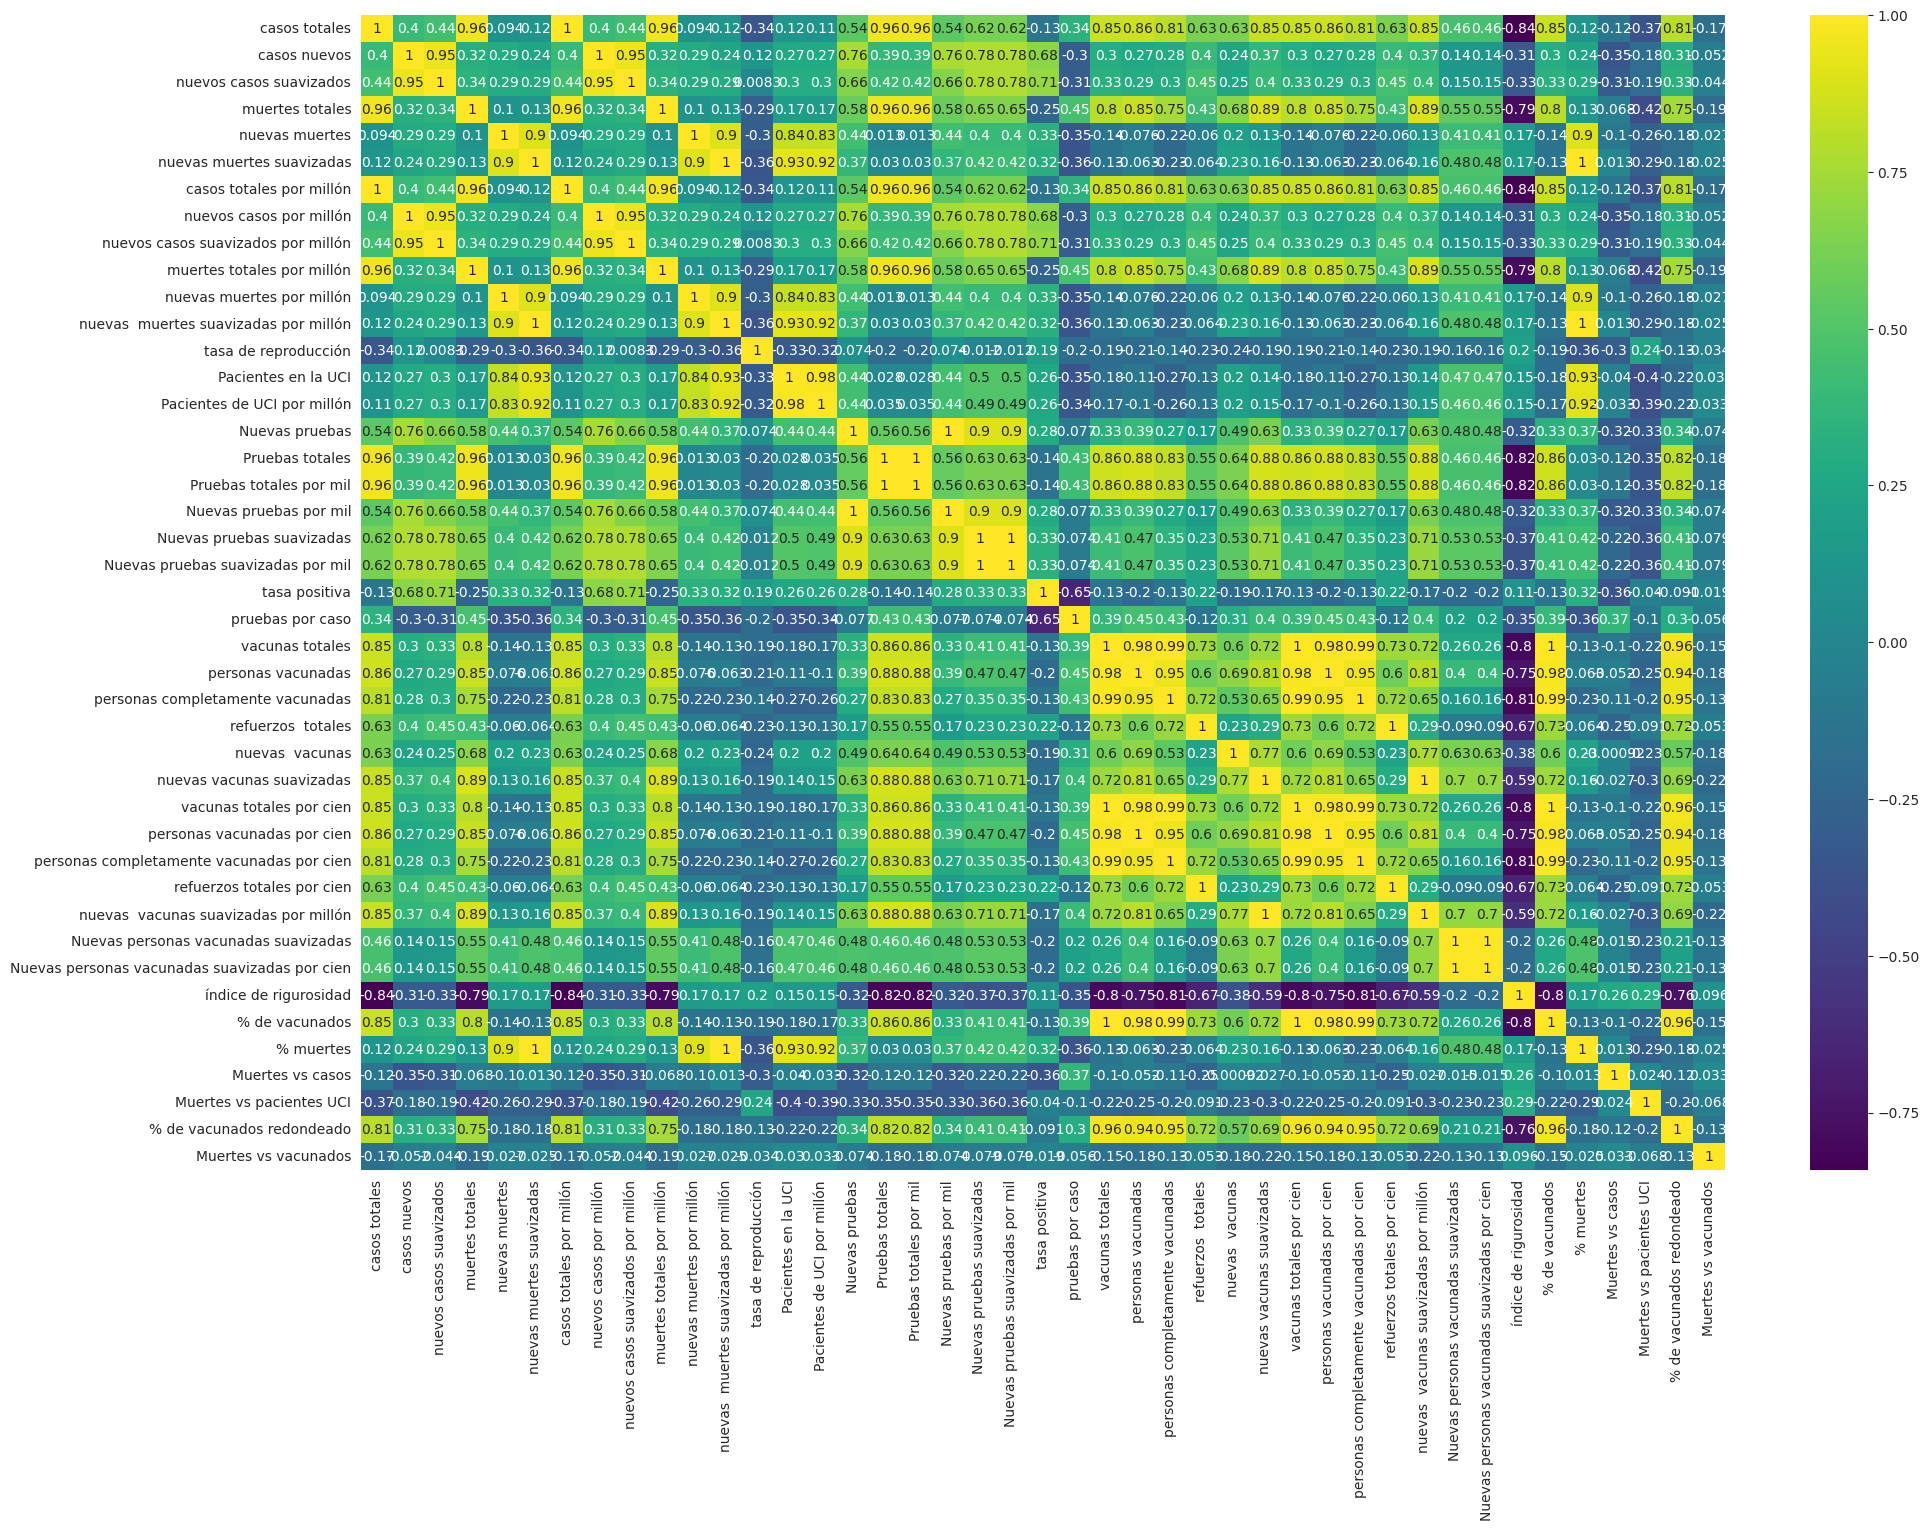

In [69]:
plt.figure(figsize=(22, 15))
sns.heatmap(CorrelacionArg, cmap='viridis', annot=True)

In [70]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    numeric_data = data.select_dtypes(include='number')
    au_corr = numeric_data.corr().abs().unstack()
    labels_to_drop = parejas(numeric_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    au_corr = au_corr[au_corr < 0.95]
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(CorrelacionArg_df, 10)) # Saquemos el top 10

Correlaciones mas grandes
personas completamente vacunadas           % de vacunados redondeado             0.949564
personas completamente vacunadas por cien  % de vacunados redondeado             0.949561
nuevos casos por millón                    nuevos casos suavizados por millón    0.945345
casos nuevos                               nuevos casos suavizados por millón    0.945345
nuevos casos suavizados                    nuevos casos por millón               0.945345
casos nuevos                               nuevos casos suavizados               0.945345
personas vacunadas por cien                % de vacunados redondeado             0.942967
personas vacunadas                         % de vacunados redondeado             0.942967
Pacientes en la UCI                        % muertes                             0.925807
nuevas muertes suavizadas                  Pacientes en la UCI                   0.925807
dtype: float64


Quiero eliminar las columnas que no tienen relacion ni esta generando algo en el cuadro de correlaciones. Vamos a sacar "'Pacientes de HOSP','Pacientes de HOSP por millón','Ingresos semanales en la  UCI','Ingresos semanales en la  UCI por millón','Admisiones semanales de HOSP','Admisiones semanales de HOSP por millón','tasa positiva','Nuevas personas vacunadas suavizadas por cien','población','densidad de población','edad mediana','65 años más','70 años más','PIB per cápita','pobreza extrema','tasa de  mortalidad cardiovasca','prevalencia de diabetes','mujeres fumadoras','fumadores masculinos','instalaciones para  lavarse las manos','camas de hospital por mil','esperanza de vida','índice de desarrollo humano','exceso de mortalidad acumulada absoluta','exceso de mortalidad acumulativo','exceso de  mortalidad	','exceso de mortalidad acumulada por millón'].
Todas las columnas que tengan algun valor relativo ya sea por millon, suavizadas o algo por el estilo se eliminan y quedan las siguientes


In [71]:
col_a_usar = ['casos nuevos','nuevas muertes','nuevas muertes suavizadas','tasa de reproducción','Pacientes en la UCI','Nuevas pruebas','pruebas por caso','personas vacunadas','personas completamente vacunadas','refuerzos  totales','nuevas  vacunas','índice de rigurosidad']


In [72]:
CorrelacionArg_df = covid_arg[col_a_usar]
CorrelacionArg_df.head()

casos nuevos  nuevas muertes  nuevas muertes suavizadas  \
5921           4.0             1.0                      0.000   
5926          12.0             1.0                      0.000   
5932          18.0             1.0                      0.286   
5934          30.0             1.0                      0.286   
5937          86.0             2.0                      0.571   

      tasa de reproducción  Pacientes en la UCI  Nuevas pruebas  \
5921                  0.00                 11.0            29.0   
5926                  0.00                 11.0            88.0   
5932                  0.00                 11.0           152.0   
5934                  2.35                 11.0           323.0   
5937                  2.11                 11.0           445.0   

      pruebas por caso  personas vacunadas  personas completamente vacunadas  \
5921               5.9                 0.0                               0.0   
5926               5.9                 0.0                               0.0   
5932               6.6                 0.0                               0.0   
5934               5.6                 0.0                               0.0   
5937               4.5                 0.0                               0.0   

      refuerzos  totales  nuevas  vacunas  índice de rigurosidad  
5921                 0.0              0.0                  11.11  
5926                 0.0              0.0                  25.00  
5932                 0.0              0.0                  75.00  
5934                 0.0              0.0                  88.89  
5937                 0.0              0.0                 100.00

<Axes: >

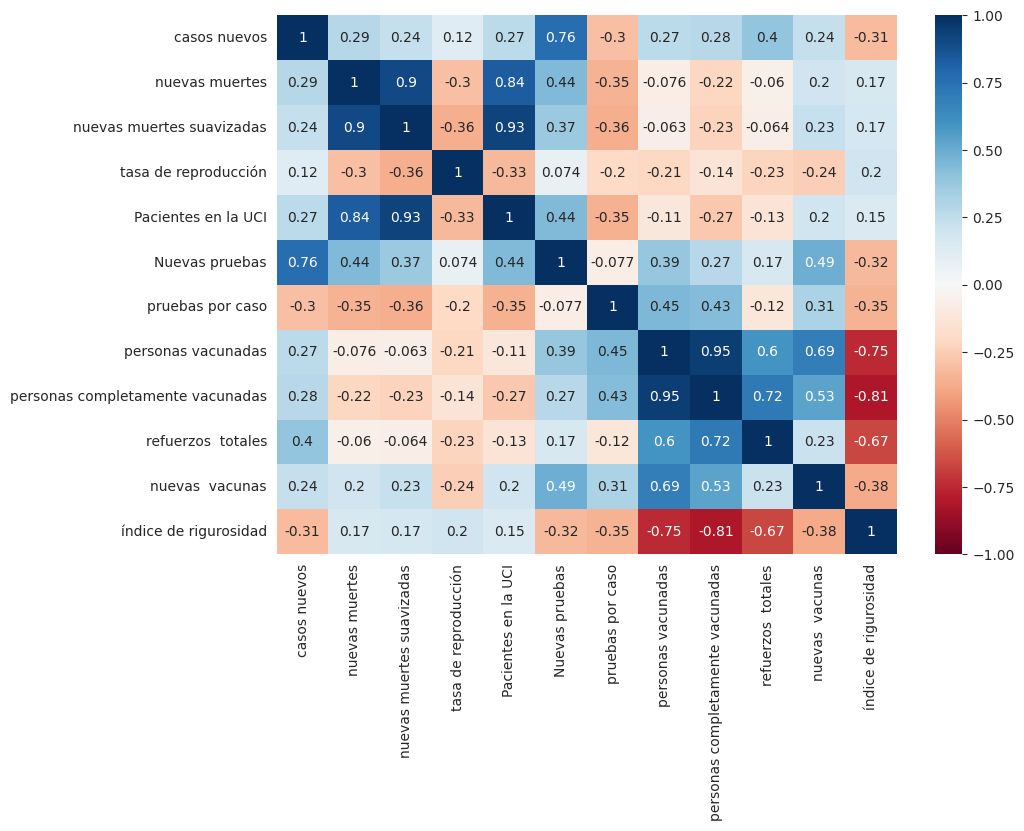

In [73]:
CorrelacionArg1 = CorrelacionArg_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(CorrelacionArg1,annot=True , cmap='RdBu' , vmin=-1 , vmax=1)

Conclusiones que se pueden sacar del grafico anterior:

 - 0.95 "Personas totalmente vacunadas" con "personas vacunadas", estamos hablando de lo mismo
 - 0.72 "refuerzos totales" con "personas completamente vacunadas", hablamos de lo mismo
 - 0.76 "Casos nuevos" tienen correlacion con "Nuevas pruebas" pero siendo que mas casos se detectan con mas pruebas, tiene sentido que asi suceda

- 0.84 "Pacientes en la UCI" vs "Nuevas muertes" es el gran ganador para predecir la cantidad de muertes

# Prediccion de Muertes
el dataset Argentina_datos lo vamos a dividir en 2 partes, uno que contenga la informacion sin personas vacunadas, y otra que tenga la informacion pero con personas vacunadas y comparar la tendencia

In [74]:
len(covid_arg.columns)

74

In [75]:
columnas_numericas = covid.select_dtypes(include=['number']).columns
covid_arg=covid_arg[columnas_numericas]
len(columnas_numericas)

62

In [76]:
X = covid_arg['Pacientes en la UCI']
X = np.array(X).reshape(-1, 1)
Xcovid = covid_arg.drop(['muertes totales', 'nuevas muertes', 'nuevas muertes suavizadas','muertes totales por millón','nuevas muertes por millón'], axis = 1)
Ycovid = covid_arg['nuevas muertes suavizadas']

In [77]:
from sklearn.model_selection import train_test_split

#defino tamaño de test
testsize=0.15

#Vamos a dividir el data set para regresion simple y multiple
X_train, X_test, Y_train, Y_test = train_test_split (X, Ycovid, test_size=testsize, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(Xcovid, Ycovid, test_size=testsize, random_state=42)

Hago la regresion lineal de los dos dataset mas pequeños, el sin vacunas y con vacunas. luego a graficarlos

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg_0 = LinearRegression()
lin_reg_1 = LinearRegression()

In [79]:
lin_reg_0.fit(X_train,Y_train)
lin_reg_1.fit(xtrain, ytrain)
ypred0 = lin_reg_0.predict(X_test)
ypred = lin_reg_1.predict(xtest)

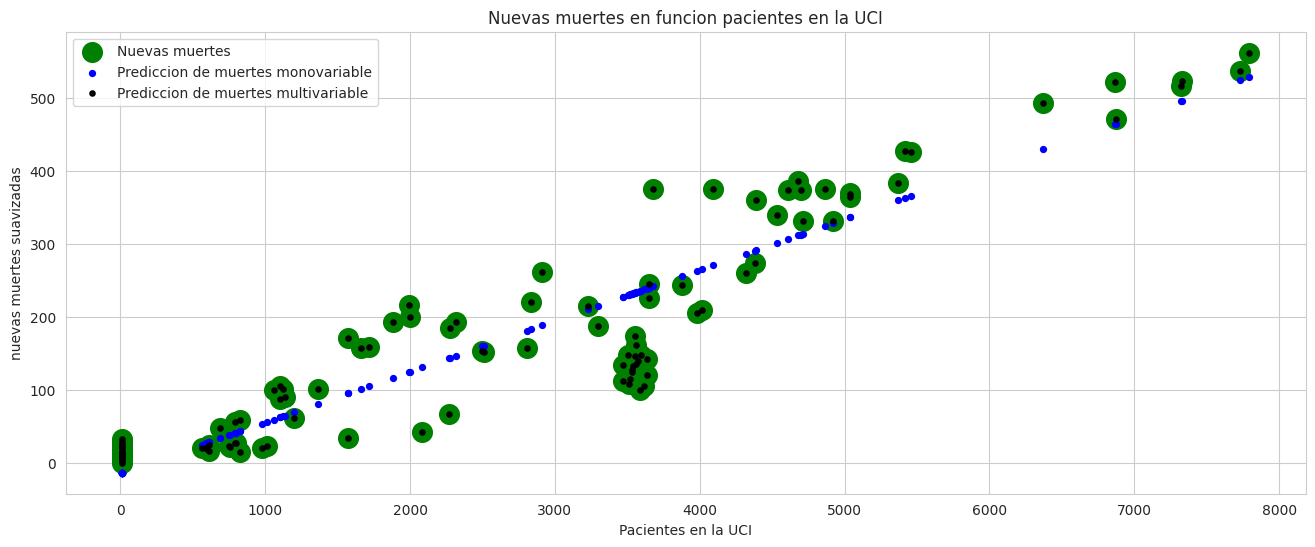

In [80]:
plt.subplots(figsize=(16,6))
plt.scatter(xtest['Pacientes en la UCI'], ytest, color="green", label='Nuevas muertes',s=200)
plt.scatter(X_test, ypred0, color="b", linewidth=3, label='Prediccion de muertes monovariable', s=5)
plt.scatter(xtest['Pacientes en la UCI'], ypred, color="black", linewidth=3, label='Prediccion de muertes multivariable', s=3)
plt.title('Nuevas muertes en funcion pacientes en la UCI')
plt.ylabel('nuevas muertes suavizadas')
plt.xlabel('Pacientes en la UCI')
plt.legend()
plt.show()

Parece que tenemos un claro overfiting

In [81]:
from sklearn.metrics import r2_score

r2_mono = r2_score(ytest,ypred0)
r2_multi = r2_score(ytest,ypred)

coeficientes_mono = lin_reg_0.coef_
intercepto_mono = lin_reg_0.intercept_


coeficientes_multi = lin_reg_1.coef_
intercepto_multi = lin_reg_1.intercept_

print("Coeficiente de Determinación (R^2) monovariable:", r2_mono)
print("Coeficientes (Pendiente):", coeficientes_mono)
print("Intercepto:", intercepto_mono)

print('--------------------------------------------------')

print("Coeficiente de Determinación (R^2) multivariable:", r2_multi)
print("Coeficientes (Pendiente):", coeficientes_multi)
print("Intercepto:", intercepto_multi)

Coeficiente de Determinación (R^2) monovariable: 0.8528810804609636
Coeficientes (Pendiente): [0.06959145]
Intercepto: -13.74891964830374
--------------------------------------------------
Coeficiente de Determinación (R^2) multivariable: 0.9999999906917454
Coeficientes (Pendiente): [ 1.89116758e-02  1.70099696e-02 -1.39597676e-02 -8.62482516e-01
 -7.75756543e-01  6.36650792e-01  4.56065319e+01 -1.46825603e-03
  5.48876851e-07 -6.87248317e-05 -9.33863743e-10 -2.35201275e-10
 -1.82289295e-10  1.67109562e-10  1.12835144e-10  1.18835497e-13
  2.83107232e-05  2.15831940e-05 -9.84334649e-01 -1.28909303e+00
 -3.15542654e-05  1.43837834e+00 -2.42755677e-02 -3.25261825e-04
 -1.14199361e-06  1.11594230e-06  4.58221338e-07 -2.33052962e-07
 -6.54246565e-09  7.28813784e-05  5.25083383e-01 -5.13516320e-01
 -2.12654125e-01  1.01355475e-01 -3.32339870e-03 -3.80348149e-06
  1.74318724e+00  8.02254221e-06  0.00000000e+00 -2.58994989e-20
  2.58994983e-20  0.00000000e+00  0.00000000e+00  2.65210860e-17
 

# Conclusion inicial:
  En la primer etapa de eventos, en el caso del dataset podemos lograr predecir las muertes con un R2=0.85 en regresion lineal simple, y con R2=0.99 con regresion multiple, lo que me indica que existe overfiting.
  



Vamos a utilizar el metodo stepwise

In [82]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
import statsmodels.api as sm

In [83]:
x2=CorrelacionArg_df.drop('nuevas muertes',1)
y2=CorrelacionArg_df['nuevas muertes']
y2 = y2.loc[x2.index]

In [84]:
infinite_values = np.isinf(x2).sum()
infinite_values

casos nuevos                        0
nuevas muertes suavizadas           0
tasa de reproducción                0
Pacientes en la UCI                 0
Nuevas pruebas                      0
pruebas por caso                    0
personas vacunadas                  0
personas completamente vacunadas    0
refuerzos  totales                  0
nuevas  vacunas                     0
índice de rigurosidad               0
dtype: int64

In [85]:
x2 = x2.replace([np.inf, -np.inf], 0)
x2 = x2.fillna(0)

In [86]:
x2.describe()

casos nuevos  nuevas muertes suavizadas  tasa de reproducción  \
count     708.000000                 708.000000            708.000000   
mean    12491.775424                 170.822831              1.064266   
std     19723.391216                 150.973157              0.299766   
min         0.000000                   0.000000              0.000000   
25%      2253.500000                  29.214500              0.890000   
50%      7347.500000                 143.214500              1.060000   
75%     13478.500000                 241.035750              1.200000   
max    139853.000000                 602.429000              2.350000   

       Pacientes en la UCI  Nuevas pruebas  pruebas por caso  \
count           708.000000      708.000000        708.000000   
mean           2653.322034    48128.278249          9.642938   
std            2018.127982    40517.735625         11.443449   
min              11.000000        0.000000          0.000000   
25%             787.500000    20771.500000          3.500000   
50%            2752.500000    40729.000000          5.200000   
75%            3750.250000    61169.000000          9.300000   
max            7969.000000   249841.000000         55.600000   

       personas vacunadas  personas completamente vacunadas  \
count        7.080000e+02                      7.080000e+02   
mean         1.147507e+07                      7.555363e+06   
std          1.495155e+07                      1.207455e+07   
min          0.000000e+00                      0.000000e+00   
25%          0.000000e+00                      0.000000e+00   
50%          4.512715e+05                      2.624360e+05   
75%          2.681433e+07                      1.053385e+07   
max          4.040344e+07                      3.620651e+07   

       refuerzos  totales  nuevas  vacunas  índice de rigurosidad  
count        7.080000e+02     7.080000e+02             708.000000  
mean         1.148044e+06     1.169459e+05              72.391059  
std          3.576663e+06     1.605920e+05              20.763089  
min          0.000000e+00     0.000000e+00               0.000000  
25%          0.000000e+00     0.000000e+00              71.760000  
50%          0.000000e+00     1.265500e+03              79.170000  
75%          0.000000e+00     2.100582e+05              87.960000  
max          1.717692e+07     1.297018e+06             100.000000

In [87]:
y2 = y2.fillna(0)

In [88]:
import statsmodels.api as sm

def stepwise_selection(data, target, SL_in=0.02, SL_out=0.02):
    initial_features = data.columns.tolist()
    best_features = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()

        if min_p_value < SL_in:
            selected_feature = new_pval.idxmin()
            best_features.append(selected_feature)
            remaining_features.remove(selected_feature)

            while len(best_features) > 0:
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()

                if max_p_value >= SL_out:
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break

    return best_features

# Example usage:
selected_features = stepwise_selection(x2, y2)
print(selected_features)


['nuevas muertes suavizadas', 'Nuevas pruebas', 'personas vacunadas', 'Pacientes en la UCI', 'tasa de reproducción', 'personas completamente vacunadas', 'casos nuevos', 'índice de rigurosidad']


Con los selected_features tengo que ver cuales tienen correlacion marcada

In [89]:
selected_features

['nuevas muertes suavizadas',
 'Nuevas pruebas',
 'personas vacunadas',
 'Pacientes en la UCI',
 'tasa de reproducción',
 'personas completamente vacunadas',
 'casos nuevos',
 'índice de rigurosidad']

In [90]:
correlacion_arg = CorrelacionArg_df[selected_features]
correlacion_arg.head()

nuevas muertes suavizadas  Nuevas pruebas  personas vacunadas  \
5921                      0.000            29.0                 0.0   
5926                      0.000            88.0                 0.0   
5932                      0.286           152.0                 0.0   
5934                      0.286           323.0                 0.0   
5937                      0.571           445.0                 0.0   

      Pacientes en la UCI  tasa de reproducción  \
5921                 11.0                  0.00   
5926                 11.0                  0.00   
5932                 11.0                  0.00   
5934                 11.0                  2.35   
5937                 11.0                  2.11   

      personas completamente vacunadas  casos nuevos  índice de rigurosidad  
5921                               0.0           4.0                  11.11  
5926                               0.0          12.0                  25.00  
5932                               0.0          18.0                  75.00  
5934                               0.0          30.0                  88.89  
5937                               0.0          86.0                 100.00

Al correr la funcion stepwise se puede observar que las columnas con mas relacion son columnas que representan datos similares, por ejemplo: "nuevas muertes por millon", "nuevas muertes suavizadas por millon", "nuevas muertes suavizadas". Si se puede observar que los pacientes de alta complegidad "UCI" son proporcionales a la cantidad de muertes.

In [91]:
correlacion_arg.fillna(0)
print('tarea finalizada')

tarea finalizada


<Axes: >

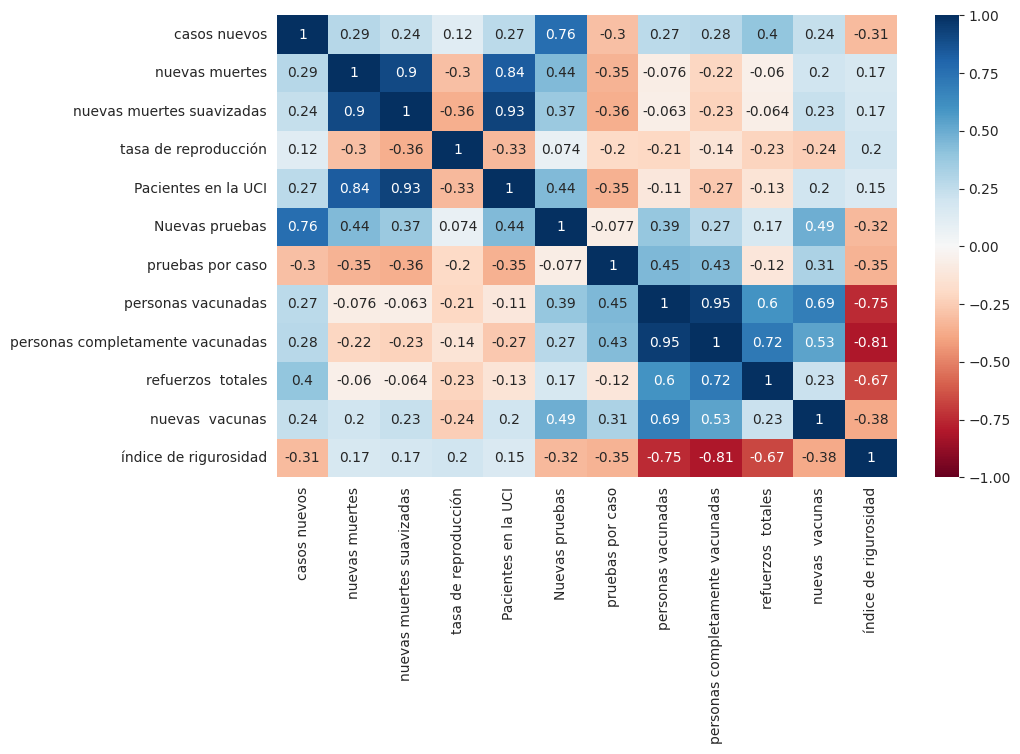

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(CorrelacionArg1,annot=True , cmap='RdBu' , vmin=-1 , vmax=1)

Conclusion: Las nuevas muertes suavizadas por millon son las que mas se correlacionan con los pacientes en la UCI. Tienen un valor de R2 de 0.93 el resto de los features son dependientes uno del otro como por ejemplo "nuevas muertes", "nuevas muertes suavizadas" y "nuevas muertes suavizadas por millon".

# Algoritmo de regresion e Hypertuning

Conociendo los valores que son mas correlacionables entre si vamos a generar los subset necesarios para trabajar en el algoritmo, lo realizaremos tanto para argentina como para algunos paises mas.

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

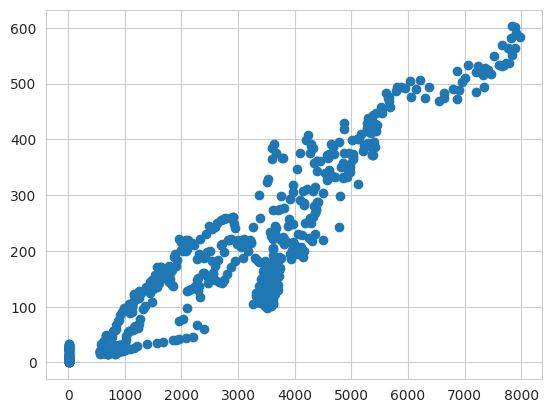

In [94]:
X = covid_arg['Pacientes en la UCI'].values.reshape(-1,1)
Y = covid_arg['nuevas muertes suavizadas'].values
plt.scatter(x=X, y=Y)

In [95]:
data_scaler = covid_arg[['Pacientes en la UCI','nuevas muertes suavizadas']]

In [96]:
scaler1=StandardScaler()

In [97]:
scaled_data = scaler1.fit_transform(data_scaler)

In [98]:
covid_arg_scaler = pd.DataFrame(scaled_data, columns=["scaled_muertes", "scaled_uci_pacientes"])

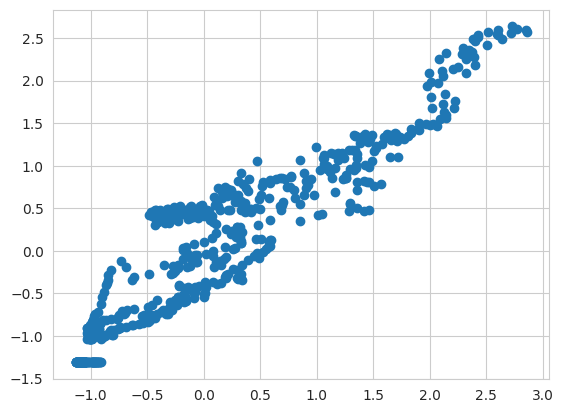

In [99]:
plt.scatter(x=covid_arg_scaler['scaled_uci_pacientes'], y=covid_arg_scaler['scaled_muertes'], )

Utilizamos un tipo de regresion lineal que tenga parametros para modificar

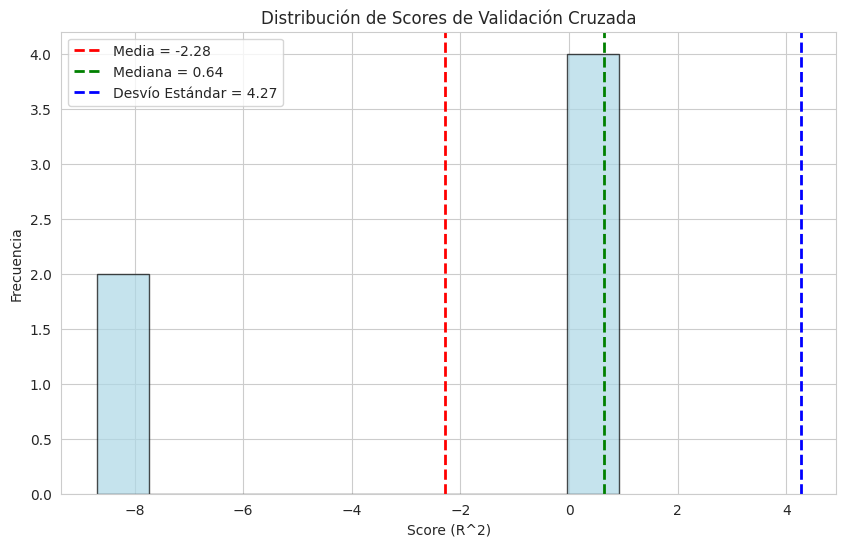

In [100]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_model = Lasso()

num_regressors = 6
cross_val_scores = cross_val_score(lasso_model, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

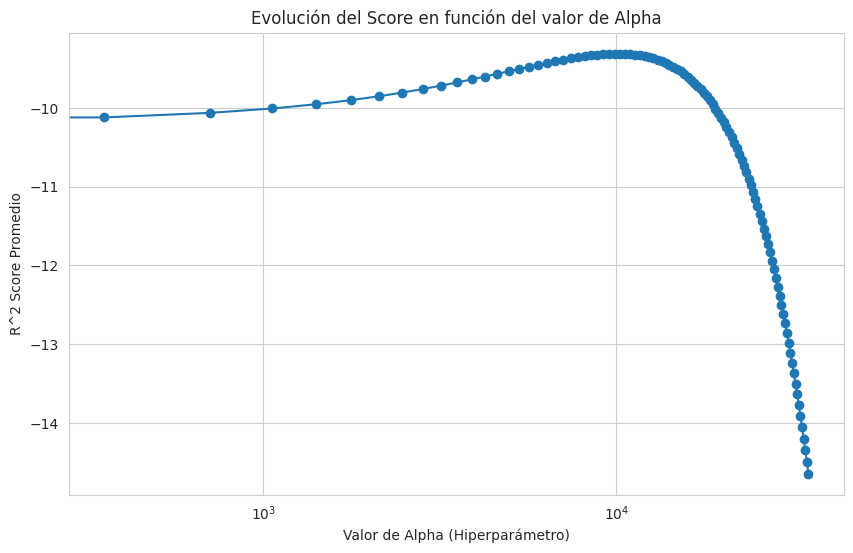

In [101]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.linspace(0, 35000, 100)}

grid_search = GridSearchCV(lasso_model, parameters, cv=10, scoring='r2')

grid_search.fit(X, Y)

results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.semilogx(parameters['alpha'], results_df['mean_test_score'], marker='o')
plt.xlabel('Valor de Alpha (Hiperparámetro)')
plt.ylabel('R^2 Score Promedio')
plt.title('Evolución del Score en función del valor de Alpha')
plt.grid(True)
plt.show()


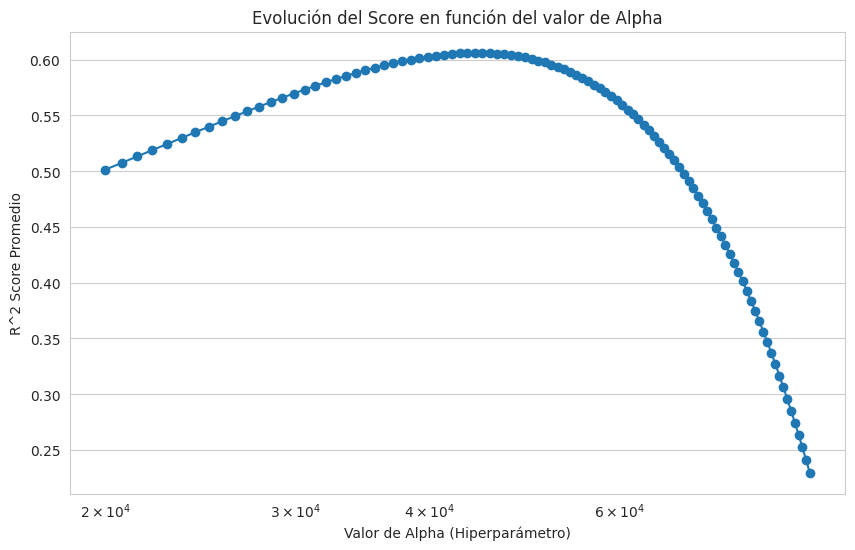

In [102]:
parameters = {'alpha': np.linspace(20000, 90000, 100)}

grid_search = GridSearchCV(lasso_model, parameters, cv=5, scoring='r2')

grid_search.fit(X, Y)

results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.semilogx(parameters['alpha'], results_df['mean_test_score'], marker='o')
plt.xlabel('Valor de Alpha (Hiperparámetro)')
plt.ylabel('R^2 Score Promedio')
plt.title('Evolución del Score en función del valor de Alpha')
plt.grid(True)
plt.show()


In [103]:
best_params = grid_search.best_params_
best_params

{'alpha': 44040.40404040404}

In [104]:
best_score = grid_search.best_score_
best_score

0.6061227388260952

Vamos a utilizar el mejor valor de alpha para el "lasso model"

In [105]:
lasso_model = Lasso(alpha=44040)

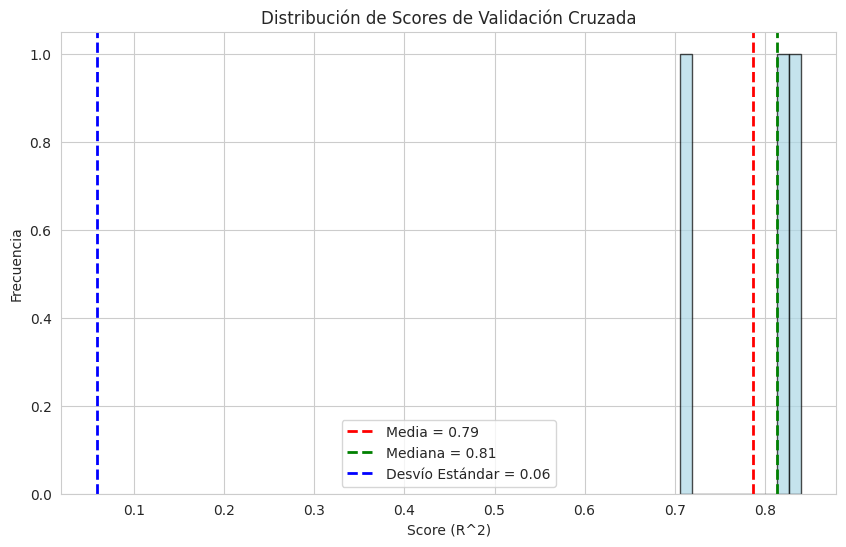

In [106]:
num_regressors = 3
cross_val_scores = cross_val_score(lasso_model, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

In [107]:
cv_results = grid_search.cv_results_
results_df = pd.DataFrame(cv_results)

Haciendo lo mismo para una "Linear Regression"

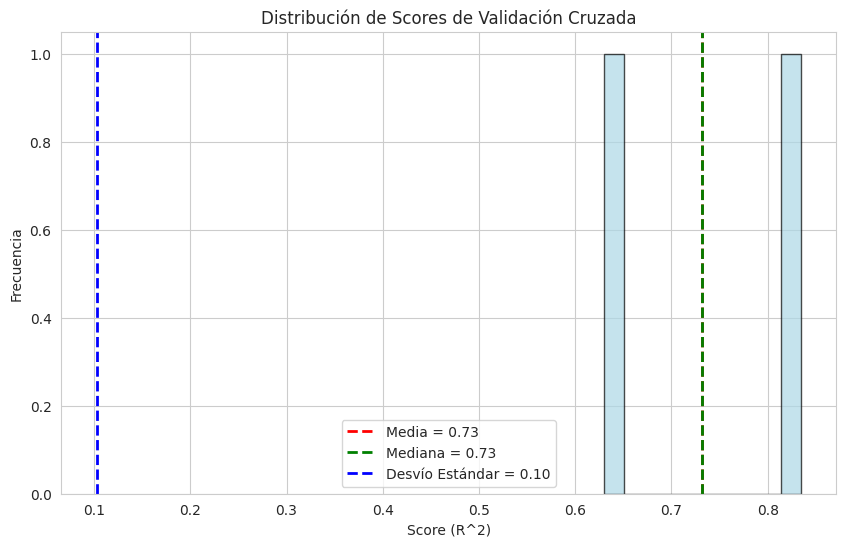

In [108]:
regresion_lineal = LinearRegression()

num_regressors = 2
cross_val_scores = cross_val_score(regresion_lineal, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

como linea regression no tiene hiperparametros a definir (salvo uno que varia entre dos valores) no le vamos a hacer gridsearch

Y utilizando Random Forest regresor

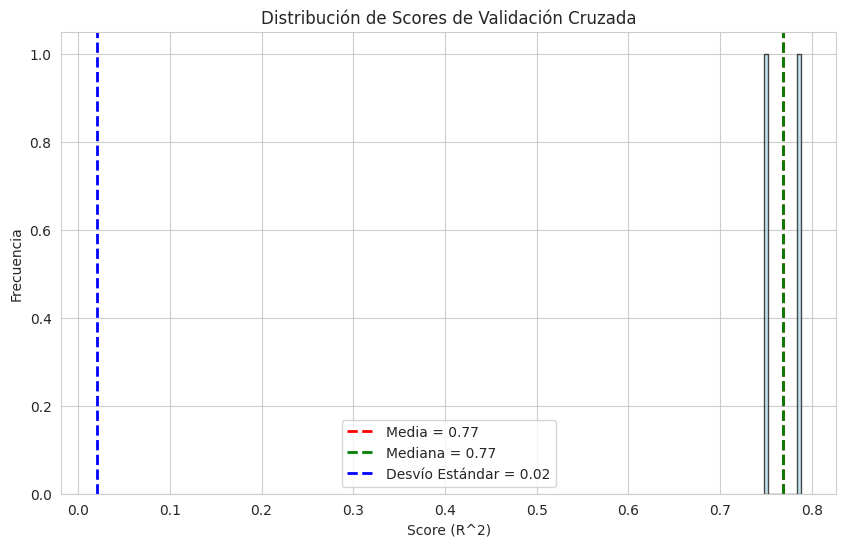

In [109]:
from sklearn.ensemble import RandomForestRegressor
Random_forest = RandomForestRegressor()

num_regressors = 2
cross_val_scores = cross_val_score(Random_forest, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

In [110]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','log2']}

In [111]:
grid_search1 = GridSearchCV(Random_forest, param_grid, cv=5, scoring='r2')
grid_search1.fit(X, Y)
results_df = pd.DataFrame(grid_search1.cv_results_)

In [112]:
pd.DataFrame(results_df).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.020204      0.001194         0.001370        0.000138   
1       0.094168      0.007602         0.003180        0.000175   
2       0.181911      0.009153         0.005414        0.000489   
3       0.018207      0.001400         0.001267        0.000070   
4       0.081683      0.002666         0.003171        0.000291   

  param_max_depth param_max_features param_min_samples_leaf  \
0            None               auto                      1   
1            None               auto                      1   
2            None               auto                      1   
3            None               auto                      1   
4            None               auto                      1   

  param_min_samples_split param_n_estimators  \
0                       2                 10   
1                       2                 50   
2                       2                100   
3                       5                 10   
4                       5                 50   

                                              params  split0_test_score  \
0  {'max_depth': None, 'max_features': 'auto', 'm...           0.463406   
1  {'max_depth': None, 'max_features': 'auto', 'm...           0.485630   
2  {'max_depth': None, 'max_features': 'auto', 'm...           0.486324   
3  {'max_depth': None, 'max_features': 'auto', 'm...           0.495774   
4  {'max_depth': None, 'max_features': 'auto', 'm...           0.502190   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.304575           0.647604           0.907650           0.609587   
1           0.326273           0.593771           0.904031           0.615517   
2           0.336490           0.628397           0.906783           0.604757   
3           0.363935           0.683368           0.911977           0.615332   
4           0.357272           0.633638           0.910822           0.616547   

   mean_test_score  std_test_score  rank_test_score  
0         0.586564        0.201016              209  
1         0.585045        0.189527              211  
2         0.592550        0.188163              200  
3         0.614078        0.184453              121  
4         0.604094        0.182437              179

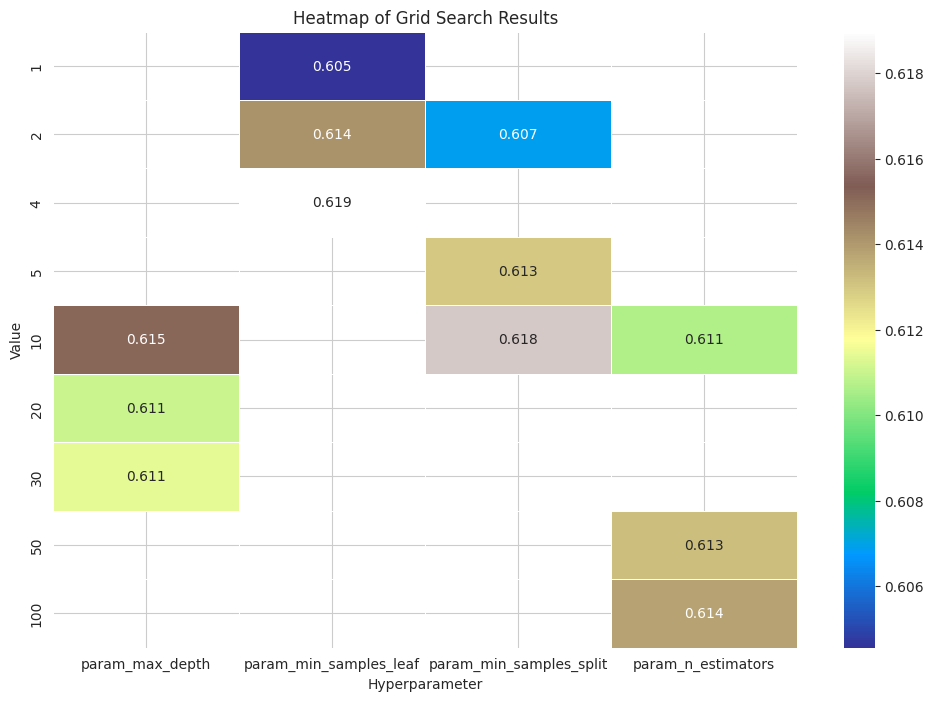

In [113]:
# defino los parametros que quiero graficar en una variable
param_cols = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']

#creo una copia que tenga las columnas param_cols y le sumo el mean_test_score
param_results = results_df[param_cols + ['mean_test_score']]

#utilizo melt para convertir las columnas en filas
param_results = param_results.melt(id_vars='mean_test_score', var_name='Hyperparameter', value_name='Value')
plt.figure(figsize=(12, 8))
sns.heatmap(data=param_results.pivot_table(index='Value', columns='Hyperparameter', values='mean_test_score'),
            annot=True, cmap='terrain', fmt=".3f", linewidths=.5)
plt.title('Heatmap of Grid Search Results')
plt.show()


# Reduccion de dimensionalidad
Reduciremos la dimensionalidad de los dataset en uso

In [114]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
covid.dtypes

Código ISO                                           object
Continente                                           object
ubicación                                            object
fecha                                        datetime64[ns]
casos totales                                       float64
                                                  ...      
índice de desarrollo humano                         float64
exceso de mortalidad acumulada absoluta             float64
exceso de mortalidad acumulativo                    float64
exceso de  mortalidad\t                             float64
exceso de mortalidad acumulada por millón           float64
Length: 67, dtype: object

In [115]:
covid_arg = covid_arg[columnas_numericas]

In [116]:
scaler = StandardScaler()
covid_scaler = scaler.fit_transform(covid_arg)

Hay que eliminar todas las columnas que indquen muertes, porque? porque es nuestro objetivo a estimar

In [117]:
from sklearn.decomposition import PCA
pca = PCA().fit(covid_scaler)

In [118]:
pca.components_.shape

(62, 62)

In [119]:
componentes = pd.DataFrame(data=pca.components_, columns=range(1, 63), index=range(1, pca.components_.shape[0]+1))
componentes.head()

1         2         3         4         5         6         7   \
1  0.226950  0.135596  0.140639  0.222379  0.043654  0.046712  0.226950   
2 -0.049062  0.154477  0.152142 -0.040163  0.286047  0.290257 -0.049062   
3 -0.037742  0.297440  0.287452 -0.114234 -0.108117 -0.138879 -0.037742   
4  0.018659 -0.026243 -0.020405  0.019160  0.007542  0.020474  0.018659   
5 -0.076544  0.112136  0.038008  0.024054 -0.197806 -0.219056 -0.076544   

         8         9         10  ...   53   54   55   56   57   58        59  \
1  0.135596  0.140639  0.222379  ...  0.0  0.0  0.0  0.0  0.0  0.0 -0.010525   
2  0.154477  0.152142 -0.040163  ... -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.020494   
3  0.297440  0.287452 -0.114234  ... -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.020898   
4 -0.026243 -0.020405  0.019160  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.505149   
5  0.112136  0.038008  0.024054  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.057324   

         60        61        62  
1 -0.007349 -0.013231 -0.010525  
2  0.023359  0.026586  0.020494  
3  0.017965  0.022167  0.020898  
4  0.506393  0.465931  0.505149  
5  0.053872  0.034295  0.057324  

[5 rows x 62 columns]

<Axes: >

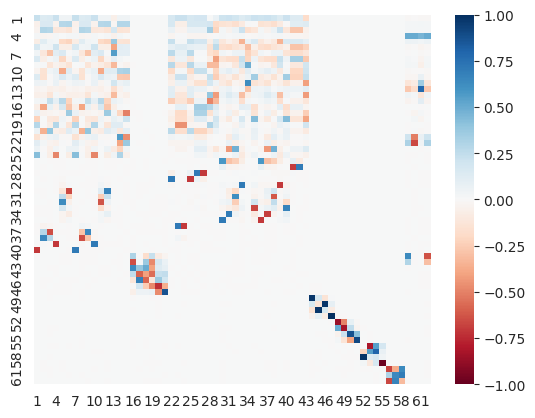

In [120]:
sns.heatmap(componentes, vmin=-1, vmax=1, cmap='RdBu')

In [121]:
var_explicada=pca.explained_variance_ratio_


(0.0, 105.0)

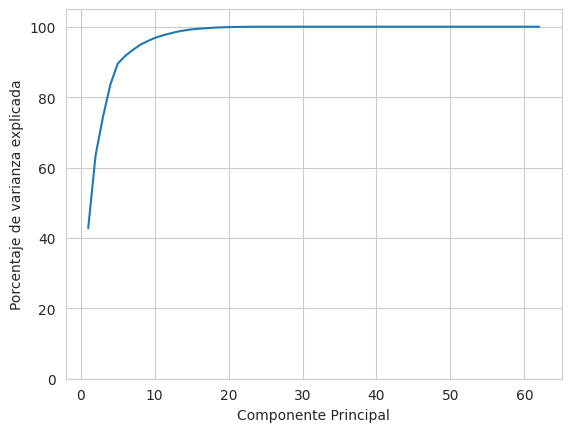

In [122]:
plt.plot(componentes.index,var_explicada.cumsum()*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim(0,105)

Text(0.5, 0, 'Componente Principal')

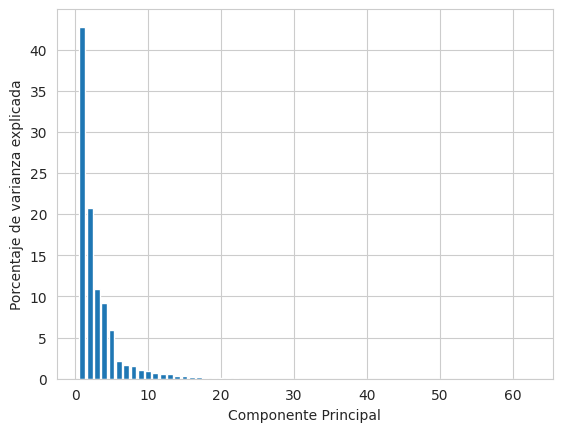

In [123]:
plt.bar(x=componentes.index, height = var_explicada*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')

In [124]:
componentes.index

RangeIndex(start=1, stop=63, step=1)

In [125]:
pd.set_option('display.max_rows', None)

In [126]:
compo=componentes.iloc[:10].abs().sum().sort_values()[::-1]


In [127]:
covid_arg_reducido=pca.transform(covid_scaler)
covid_arg_reducido=pd.DataFrame(covid_scaler[:,:15], columns=range(1,16))
covid_arg_reducido.head()

1         2         3         4         5         6         7   \
0 -1.173500 -0.633593 -0.659852 -1.336010 -1.022658 -1.132278 -1.173500   
1 -1.173493 -0.633187 -0.659633 -1.335988 -1.022658 -1.132278 -1.173493   
2 -1.173467 -0.632883 -0.659262 -1.335966 -1.022658 -1.130382 -1.173467   
3 -1.173442 -0.632274 -0.658914 -1.335944 -1.022658 -1.130382 -1.173442   
4 -1.173351 -0.629433 -0.657439 -1.335900 -1.016660 -1.128493 -1.173351   

         8         9         10        11        12        13        14  \
0 -0.633592 -0.659852 -1.336010 -1.022629 -1.132273 -3.552833 -1.310219   
1 -0.633188 -0.659632 -1.335988 -1.022629 -1.132273 -3.552833 -1.310219   
2 -0.632882 -0.659263 -1.335966 -1.022629 -1.130459 -3.552833 -1.310219   
3 -0.632274 -0.658915 -1.335944 -1.022629 -1.130459  4.292161 -1.310219   
4 -0.629432 -0.657439 -1.335900 -1.016611 -1.128343  3.490970 -1.310219   

         15  
0 -1.275685  
1 -1.275685  
2 -1.275685  
3 -1.275685  
4 -1.275685

In [128]:
xtrain=covid_arg_reducido
ytrain=covid_arg_scaler['scaled_muertes']
xtrain.shape

(708, 15)

probar con linear regresion

In [129]:
ytrain.shape

(708,)

In [130]:
linear_model2 = LinearRegression()

In [131]:
linear_model2.fit(xtrain, ytrain)

LinearRegression()

In [132]:
y_pred = linear_model2.predict(xtrain)


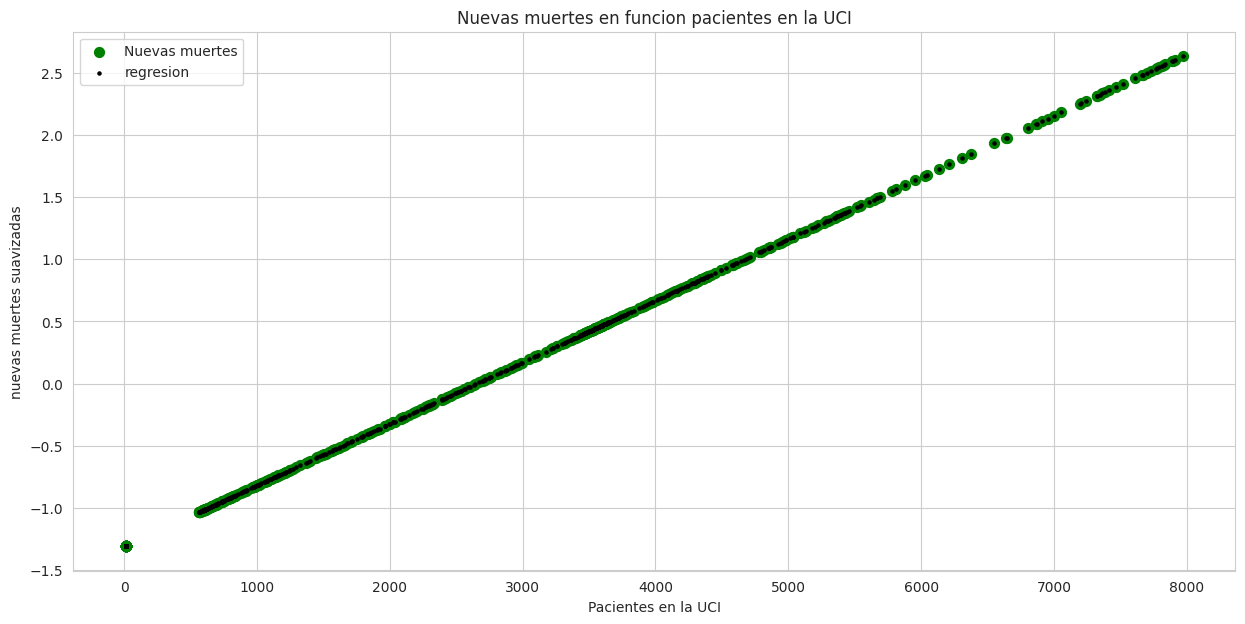

In [133]:
plt.subplots(figsize=(15,7))
plt.scatter(X, ytrain, color="green", label='Nuevas muertes', s=50)
plt.scatter(X, y_pred, color="black",  label='regresion', s=5)
plt.title('Nuevas muertes en funcion pacientes en la UCI')
plt.ylabel('nuevas muertes suavizadas')
plt.xlabel('Pacientes en la UCI')
plt.legend()
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
r2_PCA = r2_score(ytrain,y_pred)

In [136]:
print('El r2 da un valor de:', r2_PCA)
print('El MSE da un valor de:', mean_squared_error(ytrain,y_pred))

El r2 da un valor de: 1.0
El MSE da un valor de: 3.3702112661427467e-31


Me quedo con el r2 que es un muy buen valor para una regresion lineal pero creo que tengo overfiting

# Cross Validation

In [137]:
Xcovid.columns

Index(['casos totales', 'casos nuevos', 'nuevos casos suavizados',
       'casos totales por millón', 'nuevos casos por millón',
       'nuevos casos suavizados por millón',
       'nuevas  muertes suavizadas por millón', 'tasa de reproducción',
       'Pacientes en la UCI', 'Pacientes de UCI por millón',
       'Pacientes de HOSP', 'Pacientes de HOSP por millón',
       'Ingresos semanales en la  UCI',
       'Ingresos semanales en la  UCI por millón',
       'Admisiones semanales de HOSP',
       'Admisiones semanales de HOSP por millón', 'Nuevas pruebas',
       'Pruebas totales', 'Pruebas totales por mil', 'Nuevas pruebas por mil',
       'Nuevas pruebas suavizadas', 'Nuevas pruebas suavizadas por mil',
       'tasa positiva', 'pruebas por caso', 'vacunas totales',
       'personas vacunadas', 'personas completamente vacunadas',
       'refuerzos  totales', 'nuevas  vacunas', 'nuevas vacunas suavizadas',
       'vacunas totales por cien', 'personas vacunadas por cien',
       'pers

In [138]:
Xcovid.drop(['nuevas  muertes suavizadas por millón'], axis=1)
Xcovid.head()

casos totales  casos nuevos  nuevos casos suavizados  \
5921           12.0           4.0                    0.000   
5926           31.0          12.0                    4.143   
5932           97.0          18.0                   11.143   
5934          158.0          30.0                   17.714   
5937          387.0          86.0                   45.571   

      casos totales por millón  nuevos casos por millón  \
5921                     0.263                    0.088   
5926                     0.680                    0.263   
5932                     2.127                    0.395   
5934                     3.464                    0.658   
5937                     8.486                    1.886   

      nuevos casos suavizados por millón  \
5921                               0.000   
5926                               0.091   
5932                               0.244   
5934                               0.388   
5937                               0.999   

      nuevas  muertes suavizadas por millón  tasa de reproducción  \
5921                                  0.000                  0.00   
5926                                  0.000                  0.00   
5932                                  0.006                  0.00   
5934                                  0.006                  2.35   
5937                                  0.013                  2.11   

      Pacientes en la UCI  Pacientes de UCI por millón  ...  \
5921                 11.0                          0.0  ...   
5926                 11.0                          0.0  ...   
5932                 11.0                          0.0  ...   
5934                 11.0                          0.0  ...   
5937                 11.0                          0.0  ...   

      mujeres fumadoras  fumadores masculinos  \
5921               16.2                  27.7   
5926               16.2                  27.7   
5932               16.2                  27.7   
5934               16.2                  27.7   
5937               16.2                  27.7   

      instalaciones para  lavarse las manos  camas de hospital por mil  \
5921                                    0.0                        5.0   
5926                                    0.0                        5.0   
5932                                    0.0                        5.0   
5934                                    0.0                        5.0   
5937                                    0.0                        5.0   

      esperanza de vida  índice de desarrollo humano  \
5921              76.67                        0.845   
5926              76.67                        0.845   
5932              76.67                        0.845   
5934              76.67                        0.845   
5937              76.67                        0.845   

      exceso de mortalidad acumulada absoluta  \
5921                                      0.0   
5926                                      0.0   
5932                                      0.0   
5934                                      0.0   
5937                                      0.0   

      exceso de mortalidad acumulativo  exceso de  mortalidad\t  \
5921                               0.0                      0.0   
5926                               0.0                      0.0   
5932                               0.0                      0.0   
5934                               0.0                      0.0   
5937                               0.0                      0.0   

      exceso de mortalidad acumulada por millón  
5921                                        0.0  
5926                                        0.0  
5932                                        0.0  
5934                                        0.0  
5937                                        0.0  

[5 rows x 57 columns]

In [139]:
Ycovid.head()

5921    0.000
5926    0.000
5932    0.286
5934    0.286
5937    0.571
Name: nuevas muertes suavizadas, dtype: float64

In [140]:
xtrain,xtest,ytrain,ytest = train_test_split(Xcovid,Ycovid, test_size=0.15)

In [141]:
linear_model3 = LinearRegression()

In [142]:
linear_model3.fit(xtrain, ytrain)

LinearRegression()

In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linear_model3, xtrain, ytrain, cv=kfold, scoring='neg_mean_squared_error')

In [144]:
scores

array([-0.00021912, -0.00016685, -0.00018471, -0.0002037 , -0.00018003])

In [145]:
RCV = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores_RCV = cross_val_score(linear_model3, xtrain, ytrain, cv=RCV, scoring='neg_mean_squared_error')


In [146]:
scores_RCV

array([-0.00021912, -0.00018811, -0.00018092, -0.00020495, -0.00019504])

In [147]:
scores = cross_val_score(linear_model3, xtrain, ytrain, cv=kfold, scoring='r2')
scores

array([0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999])

In [148]:
scores2 = cross_val_score(linear_model3, xtrain, ytrain, cv=kfold, scoring='explained_variance')
scores2

array([0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999])

# Deep Learning y Machine Learning

In [149]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor

In [150]:
covid_arg.columns

Index(['casos totales', 'casos nuevos', 'nuevos casos suavizados',
       'muertes totales', 'nuevas muertes', 'nuevas muertes suavizadas',
       'casos totales por millón', 'nuevos casos por millón',
       'nuevos casos suavizados por millón', 'muertes totales por millón',
       'nuevas muertes por millón', 'nuevas  muertes suavizadas por millón',
       'tasa de reproducción', 'Pacientes en la UCI',
       'Pacientes de UCI por millón', 'Pacientes de HOSP',
       'Pacientes de HOSP por millón', 'Ingresos semanales en la  UCI',
       'Ingresos semanales en la  UCI por millón',
       'Admisiones semanales de HOSP',
       'Admisiones semanales de HOSP por millón', 'Nuevas pruebas',
       'Pruebas totales', 'Pruebas totales por mil', 'Nuevas pruebas por mil',
       'Nuevas pruebas suavizadas', 'Nuevas pruebas suavizadas por mil',
       'tasa positiva', 'pruebas por caso', 'vacunas totales',
       'personas vacunadas', 'personas completamente vacunadas',
       'refuerzos  tota

In [151]:
X_deep = covid_arg.drop(['muertes totales', 'nuevas muertes', 'nuevas muertes suavizadas','muertes totales por millón','nuevas muertes por millón', 'nuevas  muertes suavizadas por millón'], axis=1)

In [152]:
y_deep = covid_arg['nuevas muertes suavizadas']

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(X_deep, y_deep, test_size=0.15, random_state=42)

In [154]:
print(xtrain.shape)
xtrain.head()

(601, 56)


casos totales  casos nuevos  nuevos casos suavizados  \
6617      8472848.0       45070.0                48975.000   
5963         2839.0          81.0                   99.571   
6002        14702.0         769.0                  681.571   
6321      2551999.0       19437.0                20691.429   
6335      2879677.0       18793.0                23600.286   

      casos totales por millón  nuevos casos por millón  \
6617                185784.346                  988.251   
5963                    62.251                    1.776   
6002                   322.371                   16.862   
6321                 55957.745                  426.196   
6335                 63142.748                  412.075   

      nuevos casos suavizados por millón  tasa de reproducción  \
6617                            1073.876                  0.59   
5963                               2.183                  1.14   
6002                              14.945                  1.33   
6321                             453.701                  1.29   
6335                             517.484                  1.01   

      Pacientes en la UCI  Pacientes de UCI por millón  Pacientes de HOSP  \
6617               2762.0                       60.562                0.0   
5963                 11.0                        0.000                0.0   
6002                 11.0                        0.000                0.0   
6321               3819.0                       83.739                0.0   
6335               5036.0                      110.424                0.0   

      ...  mujeres fumadoras  fumadores masculinos  \
6617  ...               16.2                  27.7   
5963  ...               16.2                  27.7   
6002  ...               16.2                  27.7   
6321  ...               16.2                  27.7   
6335  ...               16.2                  27.7   

      instalaciones para  lavarse las manos  camas de hospital por mil  \
6617                                    0.0                        5.0   
5963                                    0.0                        5.0   
6002                                    0.0                        5.0   
6321                                    0.0                        5.0   
6335                                    0.0                        5.0   

      esperanza de vida  índice de desarrollo humano  \
6617              76.67                        0.845   
5963              76.67                        0.845   
6002              76.67                        0.845   
6321              76.67                        0.845   
6335              76.67                        0.845   

      exceso de mortalidad acumulada absoluta  \
6617                                      0.0   
5963                                      0.0   
6002                                      0.0   
6321                                      0.0   
6335                                      0.0   

      exceso de mortalidad acumulativo  exceso de  mortalidad\t  \
6617                               0.0                      0.0   
5963                               0.0                      0.0   
6002                               0.0                      0.0   
6321                               0.0                      0.0   
6335                               0.0                      0.0   

      exceso de mortalidad acumulada por millón  
6617                                        0.0  
5963                                        0.0  
6002                                        0.0  
6321                                        0.0  
6335                                        0.0  

[5 rows x 56 columns]

In [155]:
print(ytrain.shape)
ytrain.head()

(601,)


6617    259.286
5963      6.000
6002     13.143
6321    212.286
6335    373.000
Name: nuevas muertes suavizadas, dtype: float64

In [156]:
model3 = Sequential()
model3.add(Dense(90, input_dim=56, activation='relu'))
model3.add(Dense(90, activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mean_squared_error')

model3.fit(xtrain, ytrain, epochs=100, batch_size=56)

Epoch 1/100
11/11 [==============================] - 1s 5ms/step - loss: 17884407398400.0000
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 3033431277568.0000
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 936368275456.0000
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 342221783040.0000
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 123977023488.0000
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 56103141376.0000
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 19522945024.0000
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 9030311936.0000
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 5802340864.0000
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 3830089984.0000
Epoch 11/100
11/11 [==============================] - 0s 4ms/step - loss: 2921518592.0000
Epoc

In [157]:
ypred_deep = model3.predict(xtest)

4/4 [==============================] - 0s 4ms/step


In [158]:
r2_deep = r2_score(ytest,ypred_deep)
print('r2 por deep', r2_deep)

r2 por deep -5910.920567394599


In [159]:
MLP = MLPRegressor (batch_size=5)

In [160]:
MLP.fit(xtrain,ytrain)

MLPRegressor(batch_size=5)

In [161]:
ypred_mlp=MLP.predict(xtest)

In [162]:
r2mlp = r2_score(ytest,ypred_mlp)

In [163]:
print('r2 por perceptron multicapa', r2mlp)

r2 por perceptron multicapa -1165959.4773362922


# Conclusion Final

Compilar valores de R2 con sus respectivos Metodos
Graficar valores de "y predicho" respecto al "y test"

In [164]:
print('Tamaño de dataset de X')
print(X_test.shape)
print(xtest.shape)
print(xtrain.shape)
print('Tamaño de dataset de Y')
print(Y_test.shape)
print(ytest.shape)
print(ytrain.shape)

Tamaño de dataset de X
(107, 1)
(107, 56)
(601, 56)
Tamaño de dataset de Y
(107,)
(107,)
(601,)


Vamos a obtener lo y estimados por los diferentes metodos

In [165]:
lin_reg_0.fit(X_train,Y_train)
lin_reg_1.fit(xtrain,ytrain)
lasso_model.fit(xtrain,ytrain)
linear_model2.fit(xtrain,ytrain)
Random_forest.fit(xtrain,ytrain)
model3.fit(xtrain,ytrain)
MLP.fit(xtrain,ytrain)

19/19 [==============================] - 0s 2ms/step - loss: 201603040.0000


MLPRegressor(batch_size=5)

In [166]:
# Regresion lineal monovariable
y_mono = lin_reg_0.predict(X_test)
# Regresion lineal multivariable
y_regresion = lin_reg_1.predict(xtest)
# Regresion lineal lasso con alpha 44044 (hypertunning)
y_lasso = lasso_model.predict(xtest)
# Regresion utilizada con PCA
y_pca = linear_model2.predict(xtest)
# Random Forest regressor
y_RFR = Random_forest.predict(xtest)
# Deeplearning con Secuencial
y_deep=model3.predict(xtest)
# Red neuronal Perceptron multicapa
y_mlp = MLP.predict(xtest)

4/4 [==============================] - 0s 3ms/step


In [167]:
print('R2 de regresion lineal monovariable',r2_score(y_mono,Y_test))
print('R2 de regresion lineal multivariable',r2_score(y_regresion,ytest))
print('R2 de regresion lineal lasso',r2_score(y_lasso,ytest))
print('R2 de regresion lineal PCA',r2_score(y_pca,ytest))
print('R2 de regresion lineal RFR',r2_score(y_RFR,ytest))
print('R2 de regresion Secuencial',r2_score(y_deep,ytest))
print('R2 de regresion mlp',r2_score(y_mlp,ytest))

R2 de regresion lineal monovariable 0.8379593518208232
R2 de regresion lineal multivariable 0.9271093070275257
R2 de regresion lineal lasso 0.6805010276545255
R2 de regresion lineal PCA 0.9271093070275257
R2 de regresion lineal RFR 0.9958019044016261
R2 de regresion Secuencial -0.2277780687025419
R2 de regresion mlp -0.2418325564711461


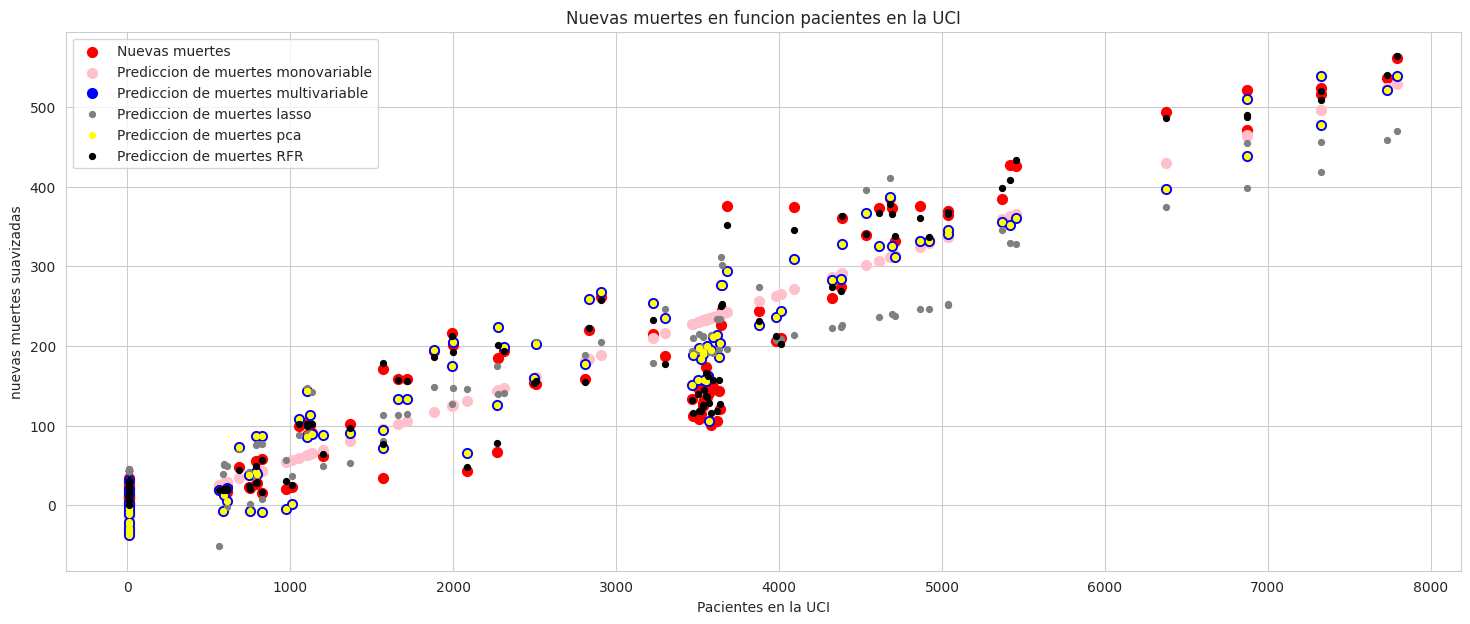

In [168]:
plt.subplots(figsize=(18,7))
plt.scatter(xtest['Pacientes en la UCI'], ytest, color="red", label='Nuevas muertes',s=50)
plt.scatter(X_test, y_mono, color="pink", linewidth=3, label='Prediccion de muertes monovariable', s=25)
plt.scatter(xtest['Pacientes en la UCI'], y_regresion, color="blue", linewidth=3, label='Prediccion de muertes multivariable', s=25)
plt.scatter(xtest['Pacientes en la UCI'], y_lasso, color="gray", linewidth=3, label='Prediccion de muertes lasso', s=5)
plt.scatter(xtest['Pacientes en la UCI'], y_pca, color="yellow", linewidth=3, label='Prediccion de muertes pca', s=5)
plt.scatter(xtest['Pacientes en la UCI'], y_RFR, color="black", linewidth=3, label='Prediccion de muertes RFR', s=5)
#plt.scatter(xtest['Pacientes en la UCI'], y_deep, color="gray", linewidth=3, label='Prediccion de muertes deep', s=5)
#plt.scatter(xtest['Pacientes en la UCI'], y_mlp, color="black", linewidth=3, label='Prediccion de muertes mlp', s=5)
plt.title('Nuevas muertes en funcion pacientes en la UCI')
plt.ylabel('nuevas muertes suavizadas')
plt.xlabel('Pacientes en la UCI')
plt.legend()
plt.show()

Conclusion: Para la estimacion de las muertes suavizadas el mejor model que se pudo encontrar en este trabajo es la regresion lineal multivariable con un score R2 de casi 0,93. En lo que respecta al uso de Secuencial y MLP no encontre parametros que logresn un mejor score que la regresion lineal simple

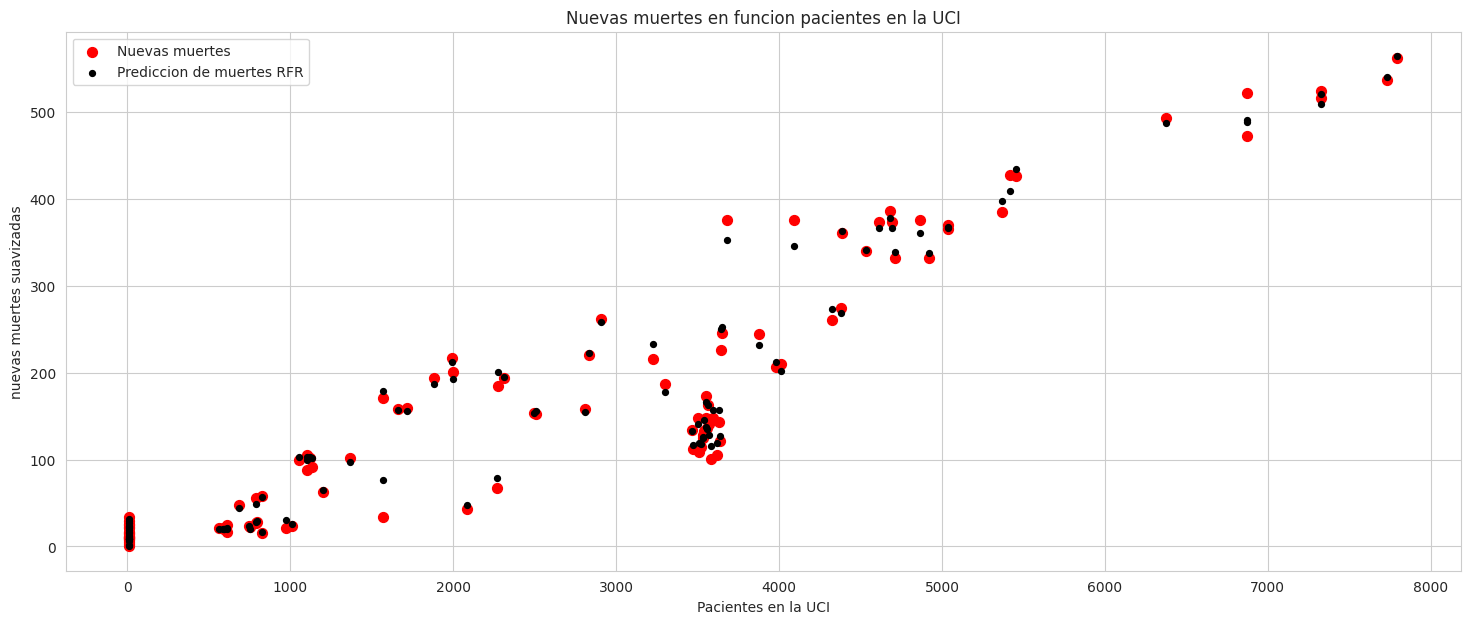

In [169]:
plt.subplots(figsize=(18,7))
plt.scatter(xtest['Pacientes en la UCI'], ytest, color="red", label='Nuevas muertes',s=50)
plt.scatter(xtest['Pacientes en la UCI'], y_RFR, color="black", linewidth=3, label='Prediccion de muertes RFR', s=5)
#plt.scatter(xtest['Pacientes en la UCI'], y_deep, color="gray", linewidth=3, label='Prediccion de muertes deep', s=5)
#plt.scatter(xtest['Pacientes en la UCI'], y_mlp, color="black", linewidth=3, label='Prediccion de muertes mlp', s=5)
plt.title('Nuevas muertes en funcion pacientes en la UCI')
plt.ylabel('nuevas muertes suavizadas')
plt.xlabel('Pacientes en la UCI')
plt.legend()
plt.show()

Es posible predecir con gran presicion las muertes durante la pandemia.